
# **Lending Club Case Study Analysis**



The analysis is divided into four main parts:



1.   Data understanding
2.   Data cleaning (cleaning missing values, removing redundant columns etc.)
3.   Data Analysis
4.   Recommendations

In [293]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [294]:
loan = pd.read_csv('/content/loan.csv')

In [295]:
loan.info(verbose=True,show_counts=True)
#Verbos is true to show full summary
#show_counts is true to show the non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

## Data Understanding

In [296]:
loan.shape

(39717, 111)

In [297]:
loan.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

In [298]:
print(loan.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)


## Data Cleaning

In [299]:
# Let's check number of NaN in each column
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [300]:
# Let's convert these counts to percentage
round((loan.isnull().sum()*100 / len(loan)),2)

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

In [301]:
#Let's remove the columns where percentage is 100%
DF = loan.dropna(axis=1, how='all')
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [302]:
# Again check the percentage of NaN in each column
round((DF.isnull().sum()*100 / len(DF)),2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [303]:
DF.index

RangeIndex(start=0, stop=39717, step=1)

In [304]:
# We have two columns next_pymnt_d and mths_since_last_record which has percentage of missing values more than 90%
# let's drop these columns

In [305]:
MoreThan90 = ['next_pymnt_d', 'mths_since_last_record']
DF.drop(MoreThan90,axis =1,inplace = True)
round((DF.isnull().sum()*100 / len(DF)),2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [306]:
# desc and mths_since_last_delinq has percentage 33% and 65% respectively, Let's check these columns
DF['desc' ].head()

0      Borrower added on 12/22/11 > I need to upgra...
1      Borrower added on 12/22/11 > I plan to use t...
2                                                  NaN
3      Borrower added on 12/21/11 > to pay for prop...
4      Borrower added on 12/21/11 > I plan on combi...
Name: desc, dtype: object

The column description contains the comments the applicant had written while applying for the loan.we will not use this column in this analysis.

In [307]:
DF['mths_since_last_delinq'].head(10)

0     NaN
1     NaN
2     NaN
3    35.0
4    38.0
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
Name: mths_since_last_delinq, dtype: float64

Months since last delinquent represents the number months passed since the person last fell into the 90 DPD group. since at the time of loan application, we will not have this data we will drop this column too

In [308]:
DF.drop(['mths_since_last_delinq','desc'] , axis =1 ,inplace =True)
round((DF.isnull().sum()*100 / len(DF)),2)

id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_title                     6.19
emp_length                    2.71
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
url                           0.00
purpose                       0.00
title                         0.03
zip_code                      0.00
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
open_acc                      0.00
pub_rec             

In [309]:
DF.isnull().sum()

id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                     2459
emp_length                    1075
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
url                              0
purpose                          0
title                           11
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec             

In [310]:
# let's drop the missing values from the emp_length column
DF = DF[~DF['emp_length'].isnull()]

# using regular expression to extract numeric values from the string
import re
DF['emp_length'] = DF['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])

DF['emp_length'] = DF['emp_length'].apply(lambda x: pd.to_numeric(x))

In [311]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38642 non-null  int64  
 1   member_id                   38642 non-null  int64  
 2   loan_amnt                   38642 non-null  int64  
 3   funded_amnt                 38642 non-null  int64  
 4   funded_amnt_inv             38642 non-null  float64
 5   term                        38642 non-null  object 
 6   int_rate                    38642 non-null  object 
 7   installment                 38642 non-null  float64
 8   grade                       38642 non-null  object 
 9   sub_grade                   38642 non-null  object 
 10  emp_title                   37202 non-null  object 
 11  emp_length                  38642 non-null  int64  
 12  home_ownership              38642 non-null  object 
 13  annual_inc                  386

 We have three types of variables -
 1. Those which are related to the applicant (demographic variables such as age, occupation, employment details etc.),
 2. Loan characteristics (amount of loan, interest rate, purpose of loan etc.) 3. Customer behaviour variables (those which are generated after the loan is approved such as delinquent 2 years, revolving balance, next payment date etc.).
 The customer behaviour variables are not available at the time of loan application, and thus they cannot be used as predictors for credit approval

In [312]:
Behaviour_var =  [
  "delinq_2yrs",
  "earliest_cr_line",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
  "application_type"]

In [313]:
# let's now remove the behaviour variables from analysis
DF2 = DF.drop(Behaviour_var, axis=1)
DF2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38642 non-null  int64  
 1   member_id                   38642 non-null  int64  
 2   loan_amnt                   38642 non-null  int64  
 3   funded_amnt                 38642 non-null  int64  
 4   funded_amnt_inv             38642 non-null  float64
 5   term                        38642 non-null  object 
 6   int_rate                    38642 non-null  object 
 7   installment                 38642 non-null  float64
 8   grade                       38642 non-null  object 
 9   sub_grade                   38642 non-null  object 
 10  emp_title                   37202 non-null  object 
 11  emp_length                  38642 non-null  int64  
 12  home_ownership              38642 non-null  object 
 13  annual_inc                  386

In [314]:
DF2 = DF2.drop(['title', 'url', 'zip_code', 'addr_state'], axis=1)

We have target variable - loan_status. Lte's convert this to a binary variable where **1** represent a person is defaulted and **0** represen not defaulted

In [315]:
# First check the value count
DF2.loan_status.value_counts()

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

**'current'** are neither fully paid not defaulted, so let's remove the current loans. And let's tag the other two values as 0 or 1.

In [316]:
# filtering only fully paid or charged-off
DF2 = DF2[DF2['loan_status'] != 'Current']
DF2['loan_status'] = DF2['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

# converting loan_status to integer type
DF2['loan_status'] = DF2['loan_status'].apply(lambda x: pd.to_numeric(x))

# summarising the values
DF2['loan_status'].value_counts()

0    32145
1     5399
Name: loan_status, dtype: int64

In [317]:
DF2.var()

id                            4.403551e+10
member_id                     7.049959e+10
loan_amnt                     5.408277e+07
funded_amnt                   5.035771e+07
funded_amnt_inv               4.947890e+07
installment                   4.363965e+04
emp_length                    1.157191e+01
annual_inc                    4.183112e+09
loan_status                   1.231281e-01
dti                           4.436294e+01
inq_last_6mths                1.147048e+00
collections_12_mths_ex_med    0.000000e+00
policy_code                   0.000000e+00
acc_now_delinq                0.000000e+00
chargeoff_within_12_mths      0.000000e+00
delinq_amnt                   0.000000e+00
pub_rec_bankruptcies          4.032016e-02
tax_liens                     0.000000e+00
dtype: float64

In [318]:
# Let's Drop Somemore columns as they are not useful
DF2 = DF2.drop(['id','member_id','collections_12_mths_ex_med','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens','policy_code'],axis=1)

In [319]:
DF2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37544 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             37544 non-null  int64  
 1   funded_amnt           37544 non-null  int64  
 2   funded_amnt_inv       37544 non-null  float64
 3   term                  37544 non-null  object 
 4   int_rate              37544 non-null  object 
 5   installment           37544 non-null  float64
 6   grade                 37544 non-null  object 
 7   sub_grade             37544 non-null  object 
 8   emp_title             36136 non-null  object 
 9   emp_length            37544 non-null  int64  
 10  home_ownership        37544 non-null  object 
 11  annual_inc            37544 non-null  float64
 12  verification_status   37544 non-null  object 
 13  issue_d               37544 non-null  object 
 14  loan_status           37544 non-null  int64  
 15  pymnt_plan         

In [320]:
DF2.head()

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment  \
0       5000         5000           4975.0   36 months   10.65%       162.87   
1       2500         2500           2500.0   60 months   15.27%        59.83   
2       2400         2400           2400.0   36 months   15.96%        84.33   
3      10000        10000          10000.0   36 months   13.49%       339.31   
5       5000         5000           5000.0   36 months    7.90%       156.46   

  grade sub_grade             emp_title  emp_length  ... annual_inc  \
0     B        B2                   NaN          10  ...    24000.0   
1     C        C4                 Ryder           1  ...    30000.0   
2     C        C5                   NaN          10  ...    12252.0   
3     C        C1   AIR RESOURCES BOARD          10  ...    49200.0   
5     A        A4  Veolia Transportaton           3  ...    36000.0   

   verification_status issue_d loan_status  pymnt_plan         purpose    dti  \
0             Verified  Dec-11           0           n     credit_card  27.65   
1      Source Verified  Dec-11           1           n             car   1.00   
2         Not Verified  Dec-11           0           n  small_business   8.72   
3      Source Verified  Dec-11           0           n           other  20.00   
5      Source Verified  Dec-11           0           n         wedding  11.20   

   inq_last_6mths  initial_list_status pub_rec_bankruptcies  
0               1                    f                  0.0  
1               5                    f                  0.0  
2               2                    f                  0.0  
3               1                    f                  0.0  
5               3                    f                  0.0  

[5 rows x 21 columns]

In [321]:
DF2.pymnt_plan.value_counts()

n    37544
Name: pymnt_plan, dtype: int64

In [322]:
# it has only one value So we will drop it
DF2.drop('pymnt_plan',axis =1 , inplace= True)
DF2.head()

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment  \
0       5000         5000           4975.0   36 months   10.65%       162.87   
1       2500         2500           2500.0   60 months   15.27%        59.83   
2       2400         2400           2400.0   36 months   15.96%        84.33   
3      10000        10000          10000.0   36 months   13.49%       339.31   
5       5000         5000           5000.0   36 months    7.90%       156.46   

  grade sub_grade             emp_title  emp_length home_ownership  \
0     B        B2                   NaN          10           RENT   
1     C        C4                 Ryder           1           RENT   
2     C        C5                   NaN          10           RENT   
3     C        C1   AIR RESOURCES BOARD          10           RENT   
5     A        A4  Veolia Transportaton           3           RENT   

   annual_inc verification_status issue_d  loan_status         purpose    dti  \
0     24000.0            Verified  Dec-11            0     credit_card  27.65   
1     30000.0     Source Verified  Dec-11            1             car   1.00   
2     12252.0        Not Verified  Dec-11            0  small_business   8.72   
3     49200.0     Source Verified  Dec-11            0           other  20.00   
5     36000.0     Source Verified  Dec-11            0         wedding  11.20   

   inq_last_6mths initial_list_status  pub_rec_bankruptcies  
0               1                   f                   0.0  
1               5                   f                   0.0  
2               2                   f                   0.0  
3               1                   f                   0.0  
5               3                   f                   0.0

In [323]:
DF2.initial_list_status.value_counts()

f    37544
Name: initial_list_status, dtype: int64

In [324]:
# it has only one value So we will drop it
DF2.drop('initial_list_status',axis =1 , inplace= True)
DF2.head()

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment  \
0       5000         5000           4975.0   36 months   10.65%       162.87   
1       2500         2500           2500.0   60 months   15.27%        59.83   
2       2400         2400           2400.0   36 months   15.96%        84.33   
3      10000        10000          10000.0   36 months   13.49%       339.31   
5       5000         5000           5000.0   36 months    7.90%       156.46   

  grade sub_grade             emp_title  emp_length home_ownership  \
0     B        B2                   NaN          10           RENT   
1     C        C4                 Ryder           1           RENT   
2     C        C5                   NaN          10           RENT   
3     C        C1   AIR RESOURCES BOARD          10           RENT   
5     A        A4  Veolia Transportaton           3           RENT   

   annual_inc verification_status issue_d  loan_status         purpose    dti  \
0     24000.0            Verified  Dec-11            0     credit_card  27.65   
1     30000.0     Source Verified  Dec-11            1             car   1.00   
2     12252.0        Not Verified  Dec-11            0  small_business   8.72   
3     49200.0     Source Verified  Dec-11            0           other  20.00   
5     36000.0     Source Verified  Dec-11            0         wedding  11.20   

   inq_last_6mths  pub_rec_bankruptcies  
0               1                   0.0  
1               5                   0.0  
2               2                   0.0  
3               1                   0.0  
5               3                   0.0

In [325]:
from datetime import datetime
DF2['issue_d']=DF2['issue_d'].apply(lambda x: datetime.strptime(x,'%b-%y'))

In [326]:
# extracting month and year from issue_date
DF2['month'] = DF2['issue_d'].apply(lambda x: x.month)
DF2['year'] = DF2['issue_d'].apply(lambda x: x.year)

In [327]:
DF2['int_rate'] = DF2.int_rate.apply(lambda x : float(x[:-1]))

In [328]:
DF2['term'] = DF2.term.apply(lambda x : int(x[:-7]))

In [329]:
DF2.head()

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment grade  \
0       5000         5000           4975.0    36     10.65       162.87     B   
1       2500         2500           2500.0    60     15.27        59.83     C   
2       2400         2400           2400.0    36     15.96        84.33     C   
3      10000        10000          10000.0    36     13.49       339.31     C   
5       5000         5000           5000.0    36      7.90       156.46     A   

  sub_grade             emp_title  emp_length  ... annual_inc  \
0        B2                   NaN          10  ...    24000.0   
1        C4                 Ryder           1  ...    30000.0   
2        C5                   NaN          10  ...    12252.0   
3        C1   AIR RESOURCES BOARD          10  ...    49200.0   
5        A4  Veolia Transportaton           3  ...    36000.0   

   verification_status    issue_d loan_status         purpose    dti  \
0             Verified 2011-12-01           0     credit_card  27.65   
1      Source Verified 2011-12-01           1             car   1.00   
2         Not Verified 2011-12-01           0  small_business   8.72   
3      Source Verified 2011-12-01           0           other  20.00   
5      Source Verified 2011-12-01           0         wedding  11.20   

   inq_last_6mths  pub_rec_bankruptcies  month  year  
0               1                   0.0     12  2011  
1               5                   0.0     12  2011  
2               2                   0.0     12  2011  
3               1                   0.0     12  2011  
5               3                   0.0     12  2011  

[5 rows x 21 columns]

## Univariate Analysis

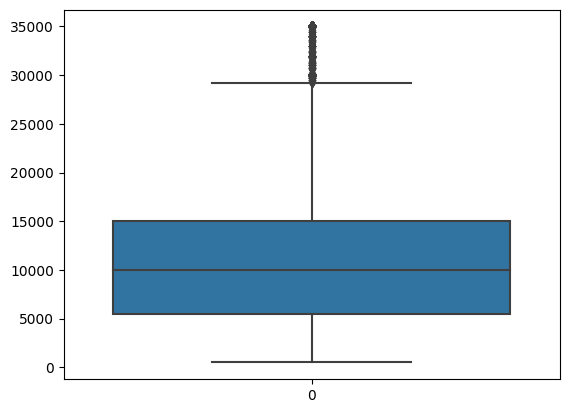

In [330]:
# Lets remove the outliers
sns.boxplot(DF2.loan_amnt)
plt.show()

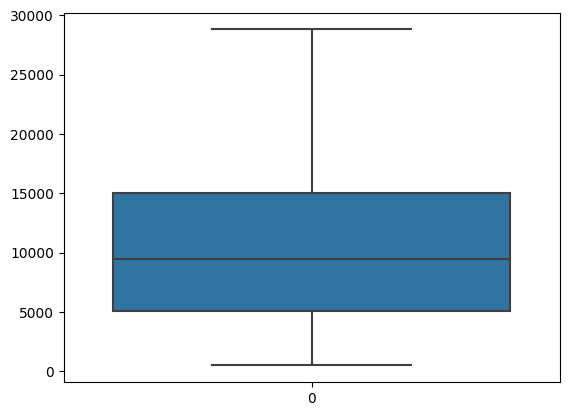

In [331]:
DF3 = DF2[DF2.loan_amnt<29000]
sns.boxplot(DF3.loan_amnt)
plt.show()

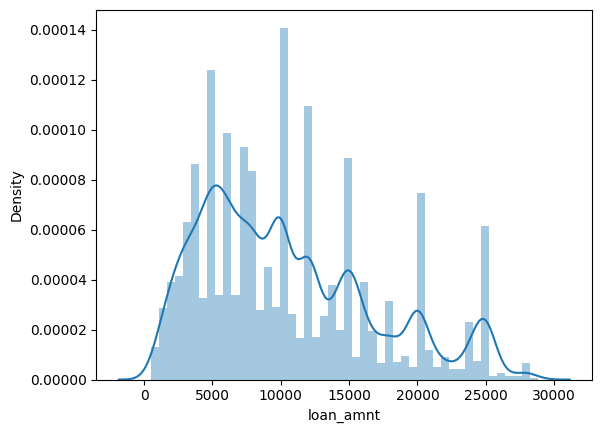

In [332]:
sns.distplot(DF3.loan_amnt)
plt.show()

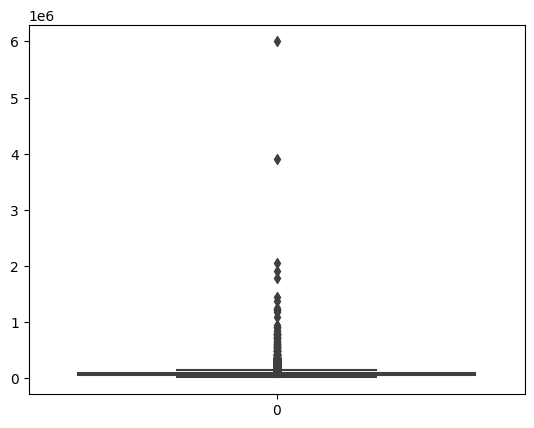

In [333]:
sns.boxplot(DF3.annual_inc)
plt.show()

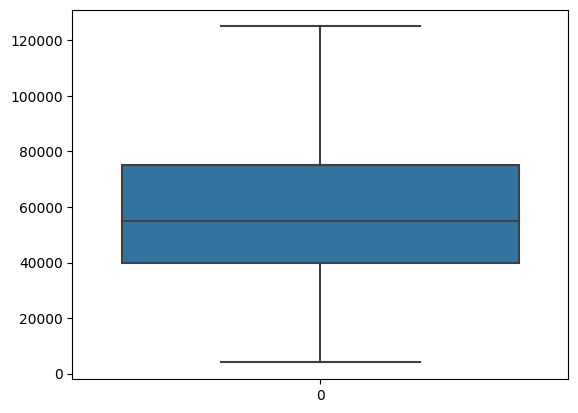

In [334]:
DF4 = DF3[DF3.annual_inc<125000]
sns.boxplot(DF4.annual_inc)
plt.show()

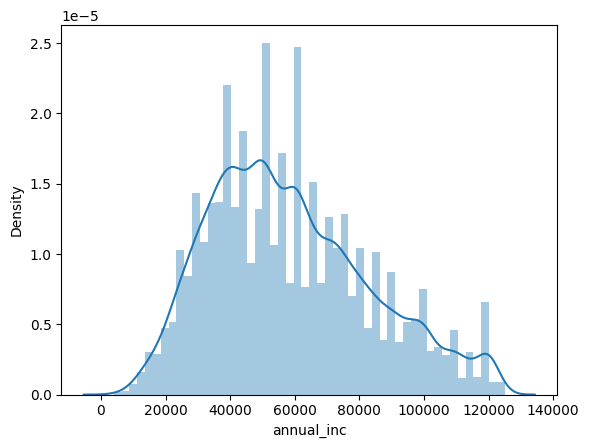

In [335]:
sns.distplot(DF4.annual_inc)
plt.show()

In [336]:
DF4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33864 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             33864 non-null  int64         
 1   funded_amnt           33864 non-null  int64         
 2   funded_amnt_inv       33864 non-null  float64       
 3   term                  33864 non-null  int64         
 4   int_rate              33864 non-null  float64       
 5   installment           33864 non-null  float64       
 6   grade                 33864 non-null  object        
 7   sub_grade             33864 non-null  object        
 8   emp_title             32707 non-null  object        
 9   emp_length            33864 non-null  int64         
 10  home_ownership        33864 non-null  object        
 11  annual_inc            33864 non-null  float64       
 12  verification_status   33864 non-null  object        
 13  issue_d         

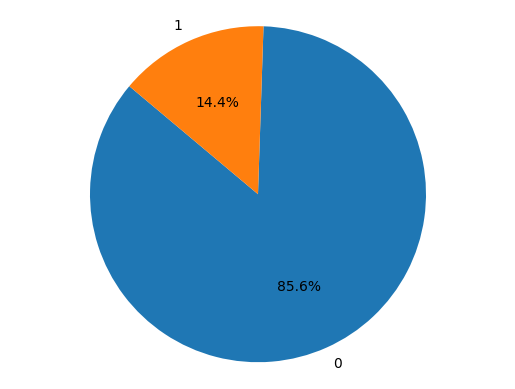

In [337]:
Status_Count = DF4.loan_status.value_counts()
#Status_Count
plt.pie(Status_Count, labels=Status_Count.index, autopct='%1.1f%%', startangle=140)  # Create the pie plot
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

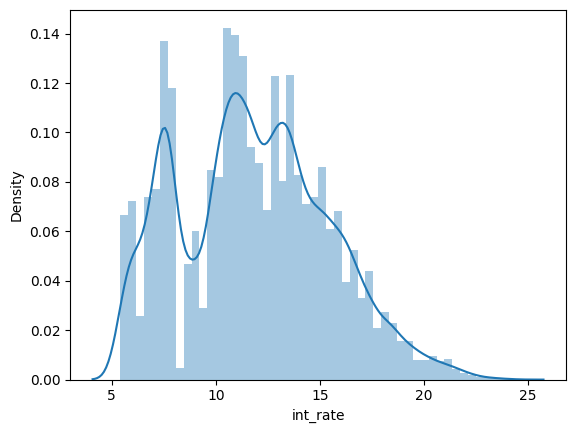

In [338]:
sns.distplot(DF4.int_rate)
plt.show()

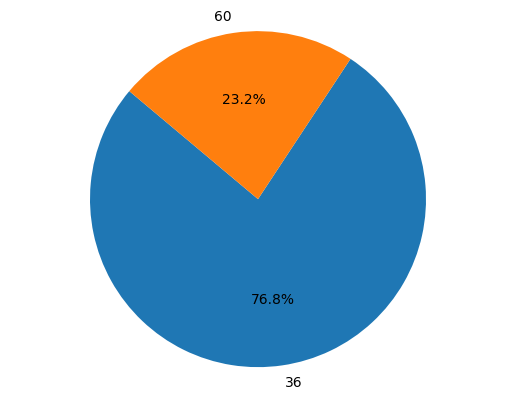

In [339]:
term_count = DF4.term.value_counts()
plt.pie(term_count, labels=term_count.index, autopct='%1.1f%%', startangle=140)  # Create the pie plot
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

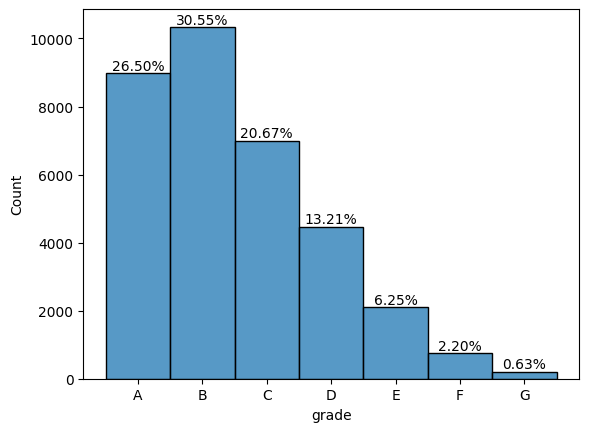

In [340]:
# Calculate the relative percentages and generate labels
rel_values = DF4['grade'].value_counts(ascending=False, normalize=True).sort_index() * 100
lbls = [f'{p:.2f}%' for p in rel_values]

# Create the histogram plot using Seaborn
ax = sns.histplot(DF4.grade.sort_values(ascending=True))

# Add percentage labels to the bars
for idx, bar in enumerate(ax.patches):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, lbls[idx], ha='center', va='bottom')

# Show the plot
plt.show()

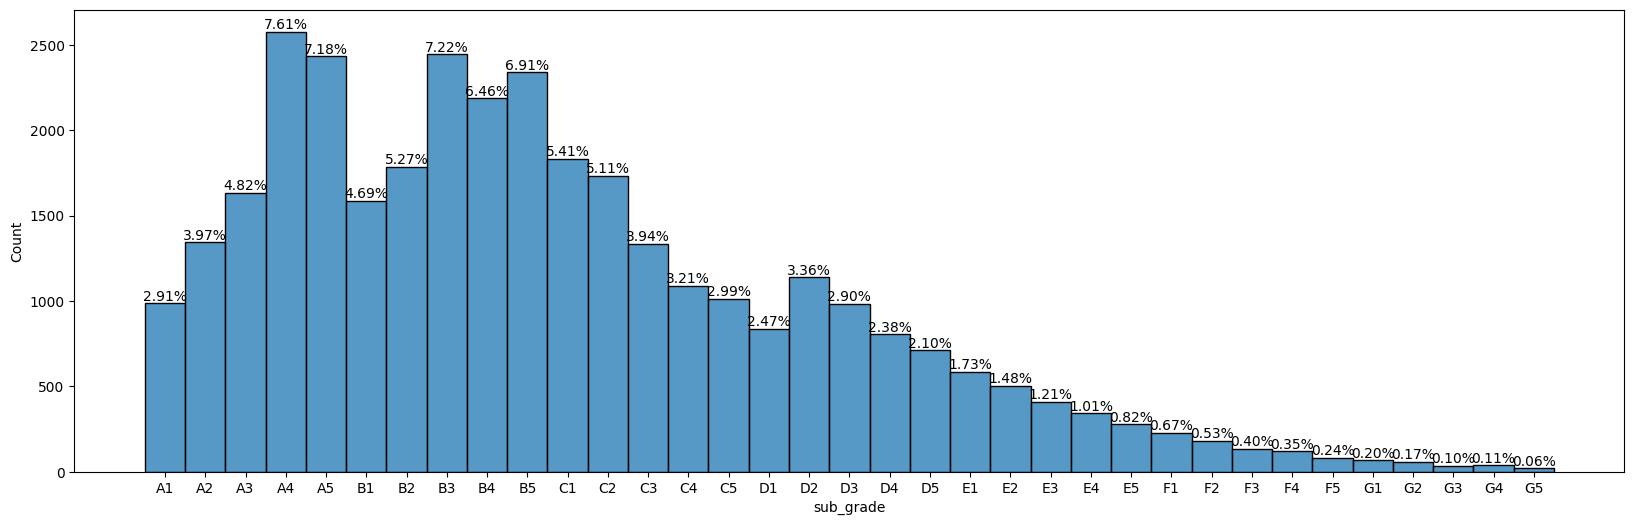

In [341]:
# Calculate the relative percentages and generate labels
rel_values = DF4['sub_grade'].value_counts(ascending=False, normalize=True).sort_index() * 100
lbls = [f'{p:.2f}%' for p in rel_values]

# The figure size
plt.figure(figsize=(20, 6))

# Create the histogram plot using Seaborn
ax = sns.histplot(DF4.sub_grade.sort_values(ascending=True))

# Add percentage labels to the bars
for idx, bar in enumerate(ax.patches):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, lbls[idx], ha='center', va='bottom')

# Show the plot
plt.show()

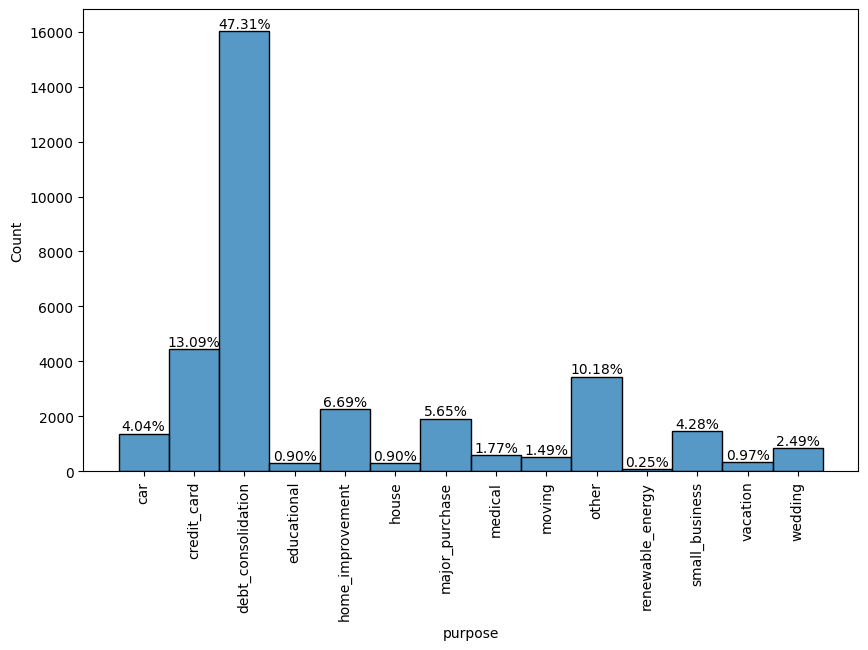

In [342]:
# Calculate the relative percentages and generate labels
rel_values = DF4['purpose'].value_counts(ascending=False, normalize=True).sort_index() * 100
lbls = [f'{p:.2f}%' for p in rel_values]


# The figure size
plt.figure(figsize=(10, 6))

# Create the histogram plot using Seaborn
ax = sns.histplot(DF4.purpose.sort_values(ascending=True))

# Add percentage labels to the bars
for idx, bar in enumerate(ax.patches):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, lbls[idx], ha='center', va='bottom')

plt.xticks(rotation =90)
# Show the plot
plt.show()

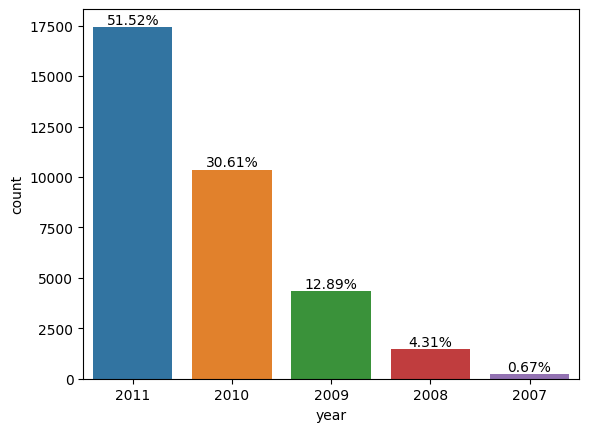

In [343]:
c=sns.countplot(x='year',order=DF4['year'].value_counts().index, data=DF4);
rel_values = DF4['year'].value_counts(ascending=False, normalize=True).values * 100
lbls= [f'{p[0]:1.2f}%' for p in zip(rel_values)]
c.bar_label(container= c.containers[0], labels=lbls)
plt.show()

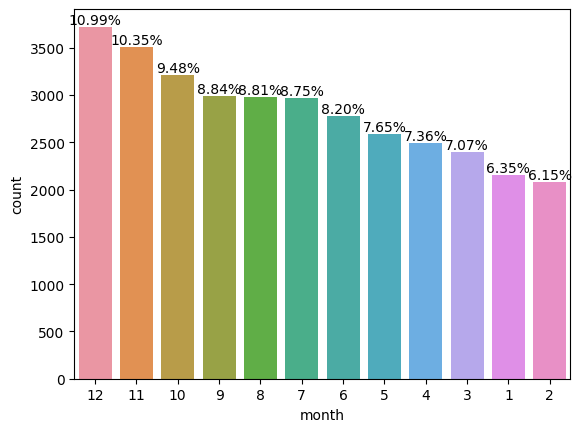

In [344]:
c=sns.countplot(x='month',order=DF4['month'].value_counts().index, data=DF4);
rel_values = DF4['month'].value_counts(ascending=False, normalize=True).values * 100
lbls= [f'{p[0]:1.2f}%' for p in zip(rel_values)]
c.bar_label(container= c.containers[0], labels=lbls)
plt.show()

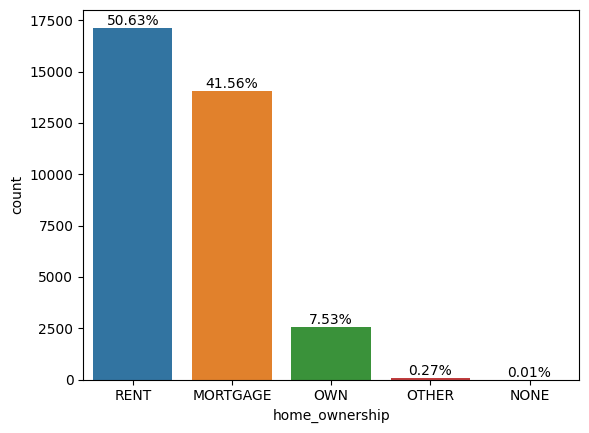

In [345]:
c=sns.countplot(x='home_ownership',order=DF4['home_ownership'].value_counts().index, data=DF4);
rel_values = DF4['home_ownership'].value_counts(ascending=False, normalize=True).values * 100
lbls= [f'{p[0]:1.2f}%' for p in zip(rel_values)]
c.bar_label(container= c.containers[0], labels=lbls)
plt.show()

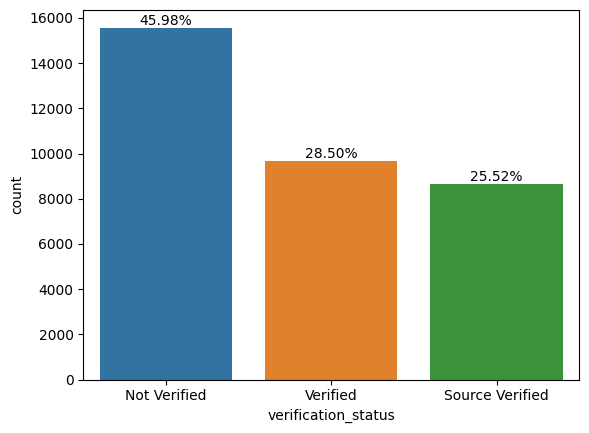

In [346]:
c=sns.countplot(x='verification_status',order=DF4['verification_status'].value_counts().index, data=DF4);
rel_values = DF4['verification_status'].value_counts(ascending=False, normalize=True).values * 100
lbls= [f'{p[0]:1.2f}%' for p in zip(rel_values)]
c.bar_label(container= c.containers[0], labels=lbls)
plt.show()

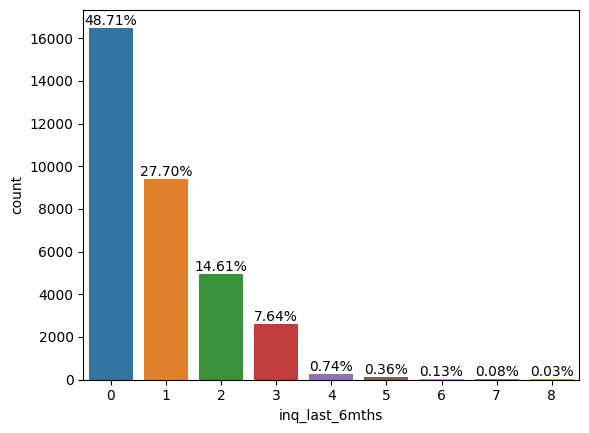

In [347]:
c=sns.countplot(x='inq_last_6mths',order=DF4['inq_last_6mths'].value_counts().index, data=DF4);
rel_values = DF4['inq_last_6mths'].value_counts(ascending=False, normalize=True).values * 100
lbls= [f'{p[0]:1.2f}%' for p in zip(rel_values)]
c.bar_label(container= c.containers[0], labels=lbls)
plt.show()

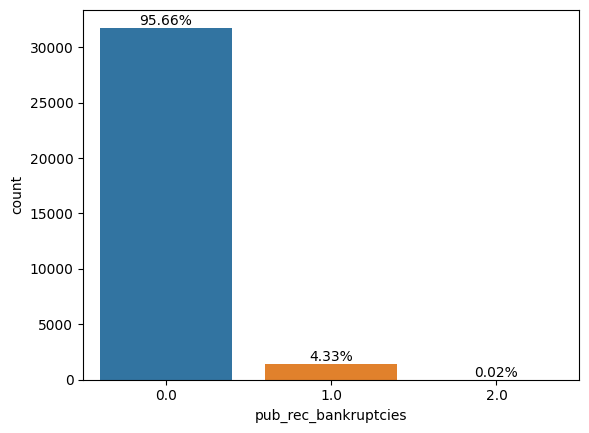

In [348]:
c=sns.countplot(x='pub_rec_bankruptcies',order=DF4['pub_rec_bankruptcies'].value_counts().index, data=DF4);
rel_values = DF4['pub_rec_bankruptcies'].value_counts(ascending=False, normalize=True).values * 100
lbls= [f'{p[0]:1.2f}%' for p in zip(rel_values)]
c.bar_label(container= c.containers[0], labels=lbls)
plt.show()

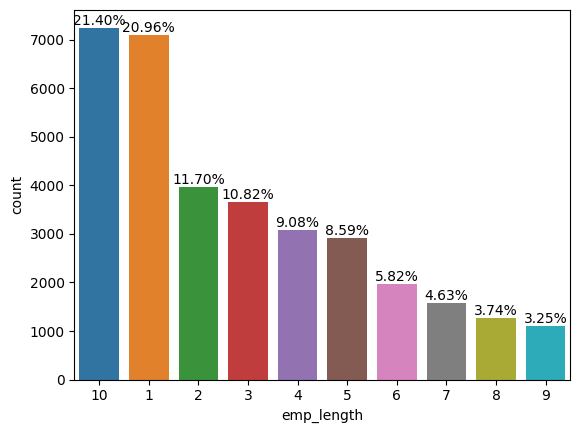

In [349]:
c=sns.countplot(x='emp_length',order=DF4['emp_length'].value_counts().index, data=DF4);
rel_values = DF4['emp_length'].value_counts(ascending=False, normalize=True).values * 100
lbls= [f'{p[0]:1.2f}%' for p in zip(rel_values)]
c.bar_label(container= c.containers[0], labels=lbls)
plt.show()

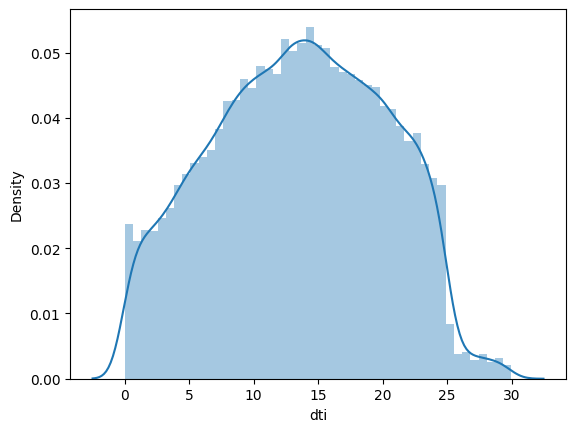

In [350]:
sns.distplot(DF4.dti)
plt.show()

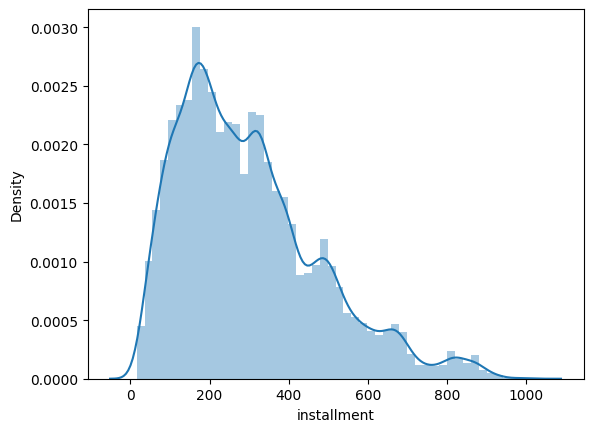

In [351]:
sns.distplot(DF4.installment)
plt.show()

## Bivariate Analysis

In [352]:
DF4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33864 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             33864 non-null  int64         
 1   funded_amnt           33864 non-null  int64         
 2   funded_amnt_inv       33864 non-null  float64       
 3   term                  33864 non-null  int64         
 4   int_rate              33864 non-null  float64       
 5   installment           33864 non-null  float64       
 6   grade                 33864 non-null  object        
 7   sub_grade             33864 non-null  object        
 8   emp_title             32707 non-null  object        
 9   emp_length            33864 non-null  int64         
 10  home_ownership        33864 non-null  object        
 11  annual_inc            33864 non-null  float64       
 12  verification_status   33864 non-null  object        
 13  issue_d         

### Let's Check Default Rate for each categorical variable

In [353]:
DF4['purpose1'] = DF4['purpose']

In [354]:
# lets define a function to plot loan_status across categorical variables


In [355]:
def plot_cat(cat_var, rotate=0):
    plt.figure(figsize=(10, 6))

    # Calculate the order based on the loan_status mean values for each category
    order = DF4.groupby(cat_var)['loan_status'].mean().sort_values(ascending=False).index

    c = sns.barplot(
        x=cat_var,
        y='loan_status',
        order=order,
        data=DF4
    )

    for bar in c.containers[0]:
        height = bar.get_height()
        c.annotate(
            f'{height * 100:.2f}%',
            xy=(bar.get_x() + bar.get_width() / 2, height),
            xytext=(0, 15),
            textcoords="offset points",
            ha='center',
            va='bottom'
        )

    plt.xticks(rotation=rotate)
    plt.show()

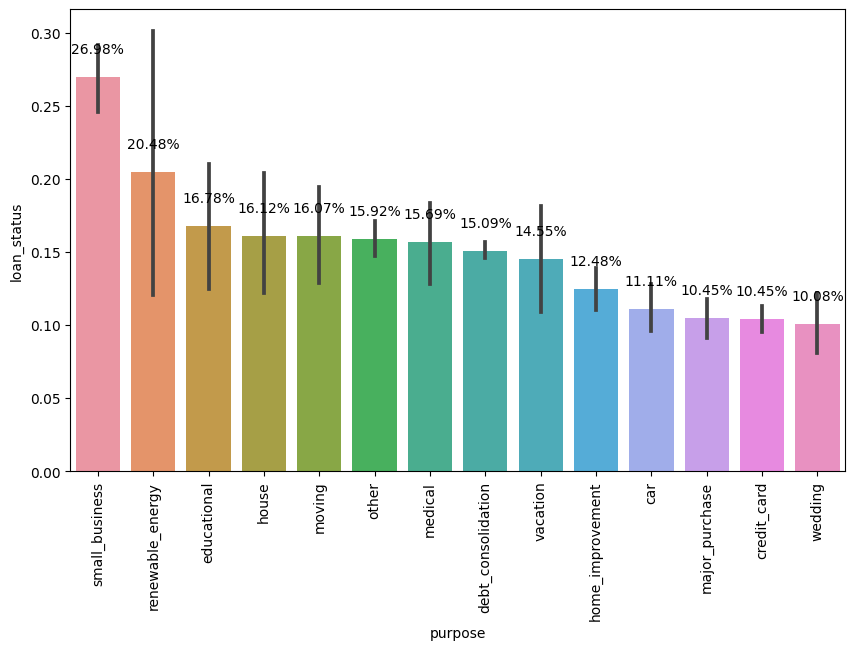

In [356]:
plot_cat('purpose',90)

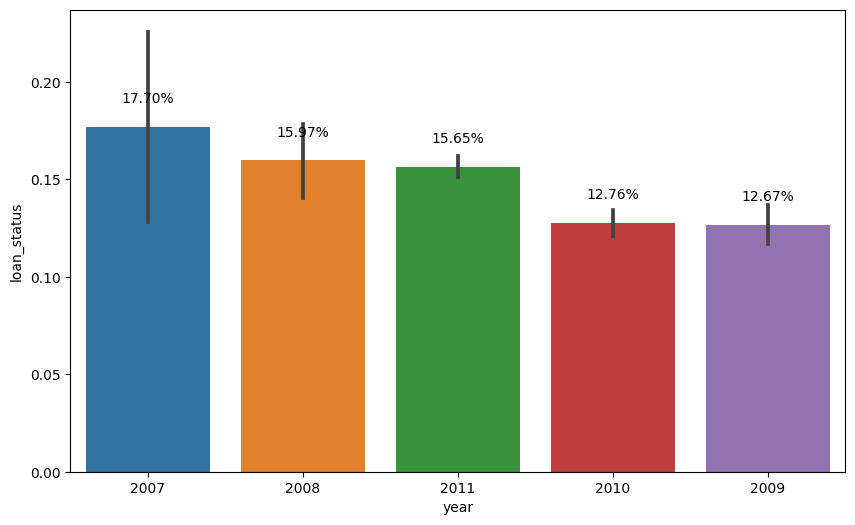

In [357]:
plot_cat('year')

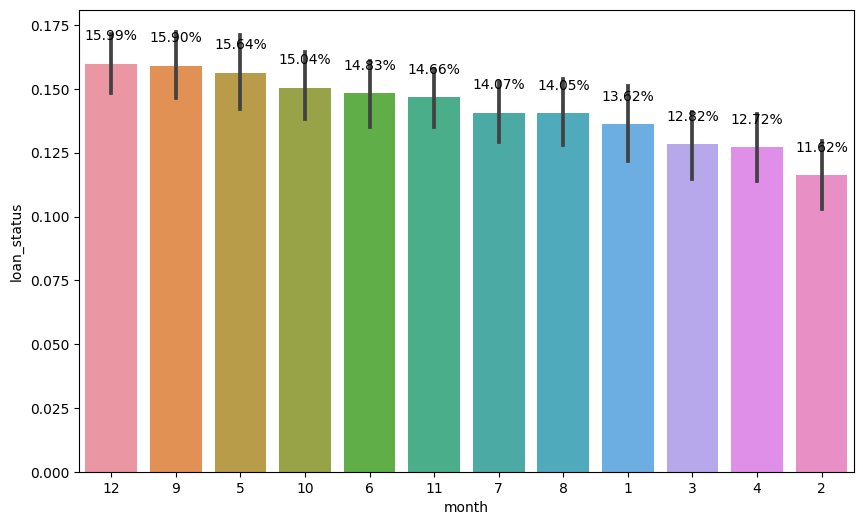

In [358]:
plot_cat('month')

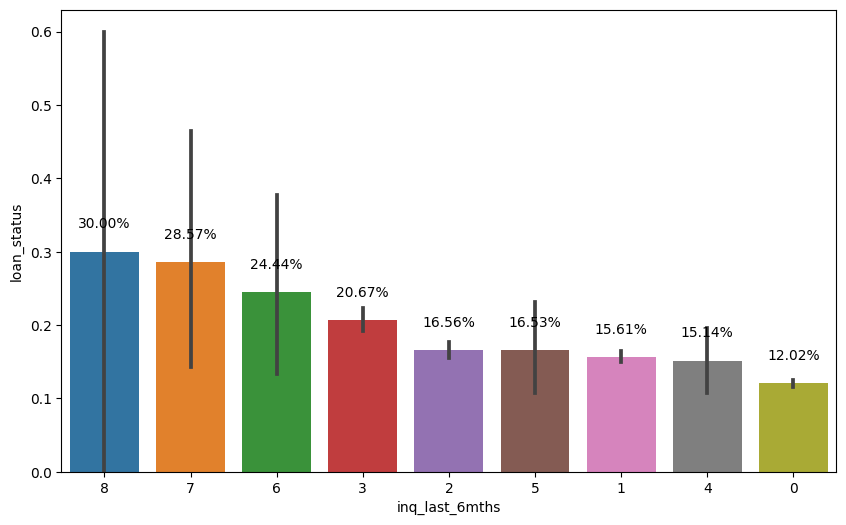

In [359]:
plot_cat("inq_last_6mths")

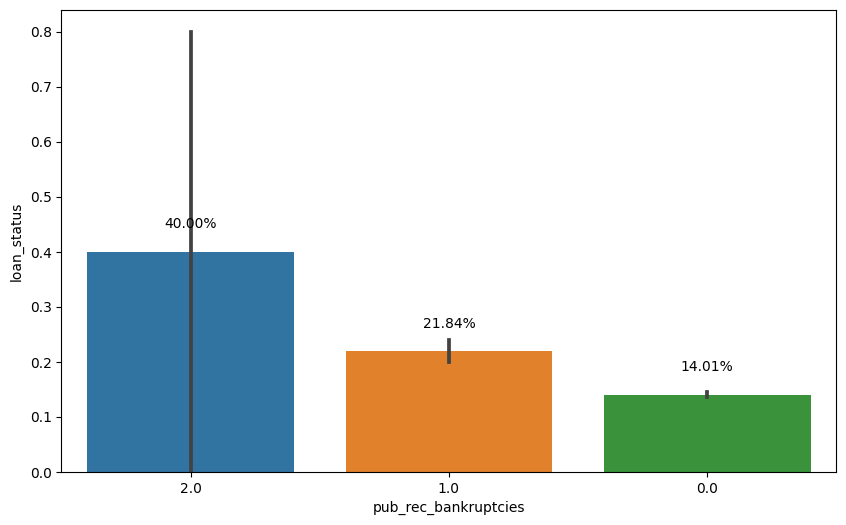

In [360]:
plot_cat('pub_rec_bankruptcies')

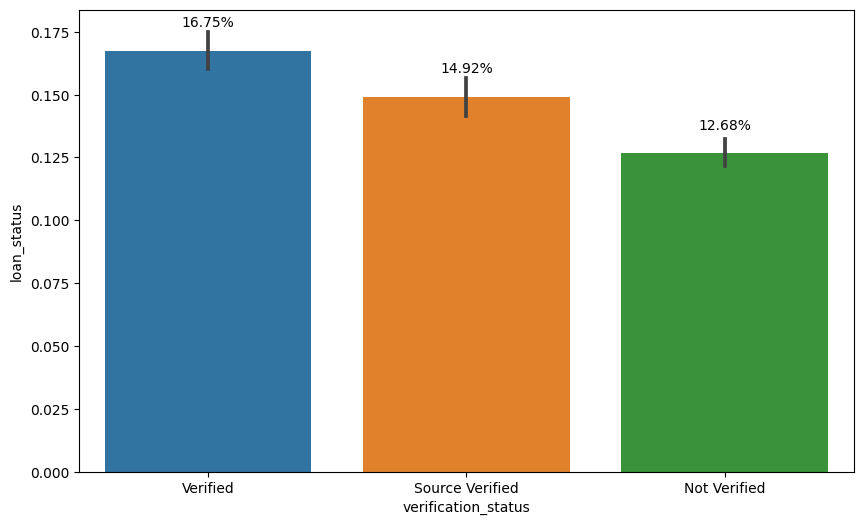

In [361]:
plot_cat('verification_status')

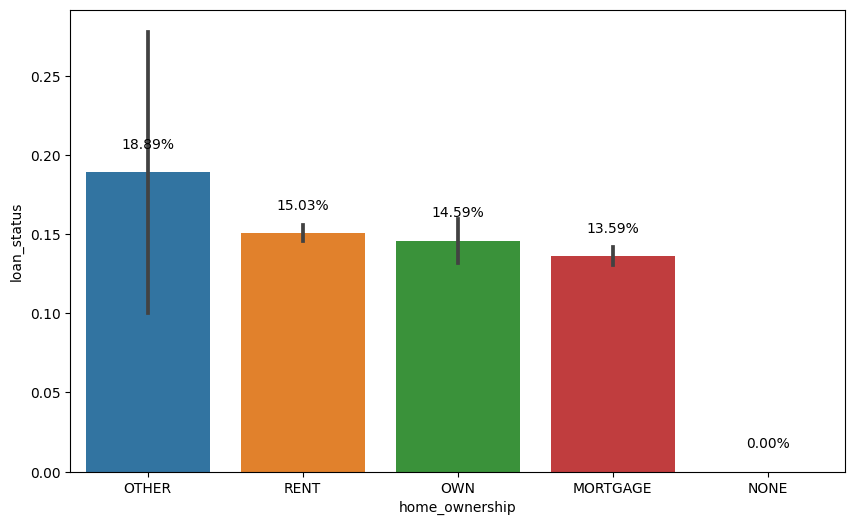

In [362]:
plot_cat('home_ownership')

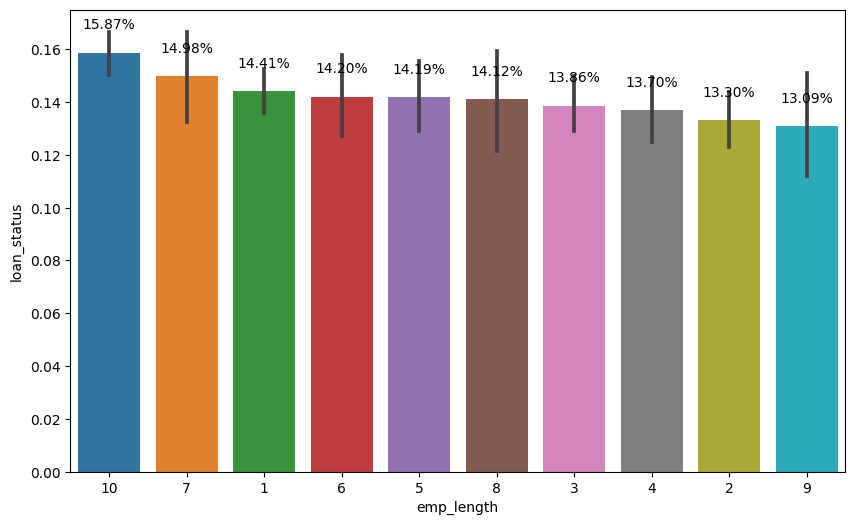

In [363]:
plot_cat('emp_length')

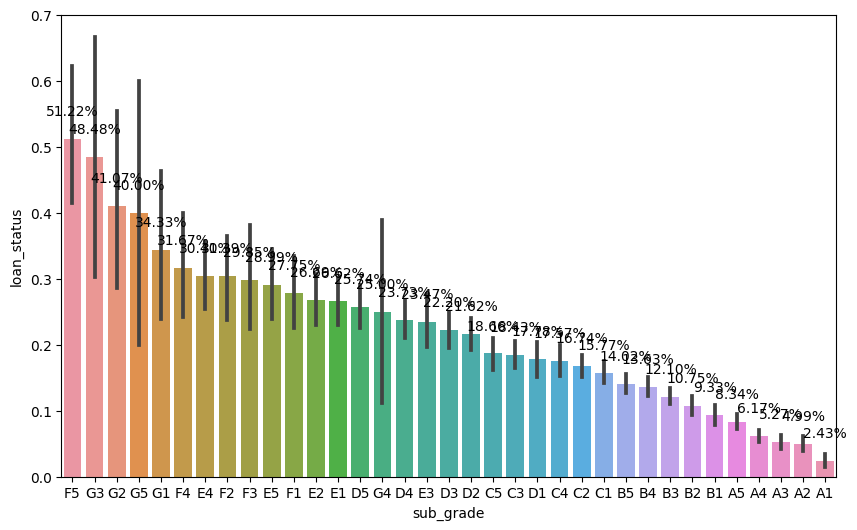

In [364]:
plot_cat('sub_grade')

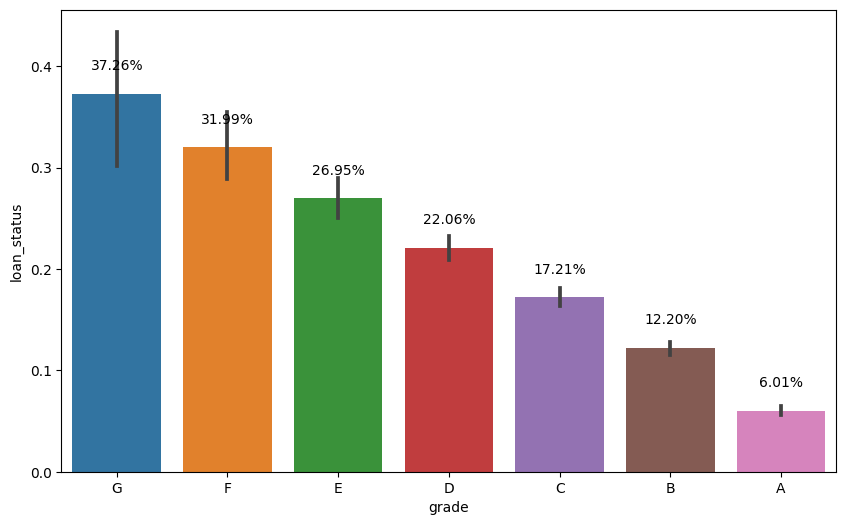

In [365]:
plot_cat('grade')

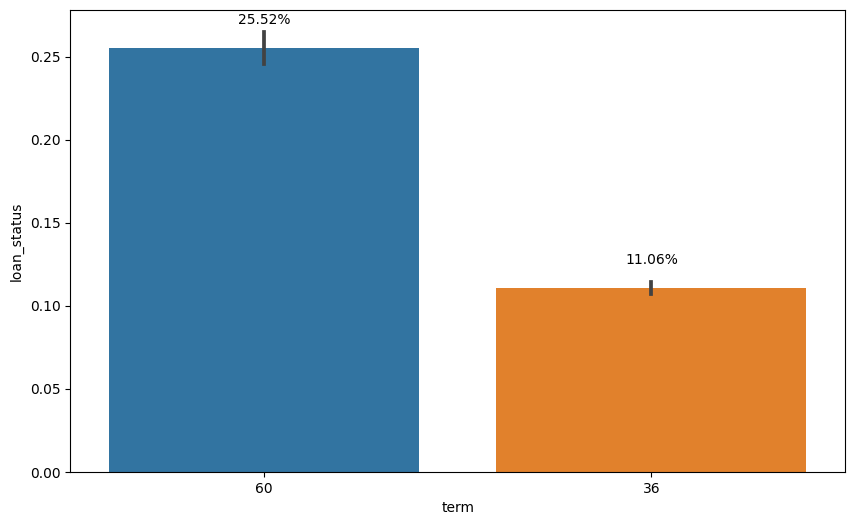

In [366]:
plot_cat('term')

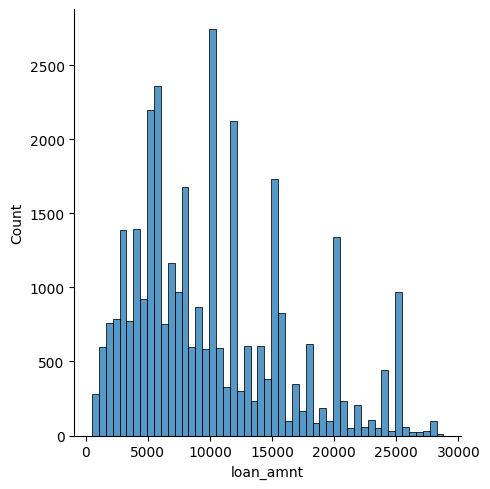

In [367]:
sns.displot(DF4['loan_amnt'])
plt.show()

The easiest way to analyse how default rates vary across continous variables is to bin the variables into discrete categories.

Let's bin the loan amount variable into small, medium, high, very high

In [368]:
# binning loan amount
def Binning_Function(n):
    if n < 5000:
        return 'low'
    elif n >=5000 and n < 12000:
        return 'medium'
    elif n >= 12000 and n < 22000:
        return 'high'
    else:
        return 'very high'



In [369]:
DF4['loan_amnt'] = DF4['loan_amnt'].apply(lambda x: Binning_Function(x))

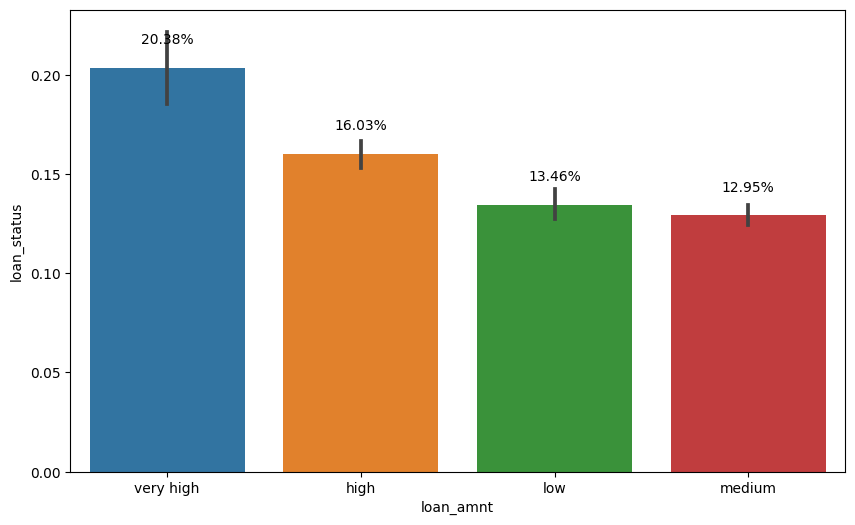

In [370]:
# let's compare the default rates across loan amount type
plot_cat('loan_amnt')

In [371]:
# let's also convert funded amount invested to bins
DF4['funded_amnt_inv'] = DF4['funded_amnt_inv'].apply(lambda x: Binning_Function(x))

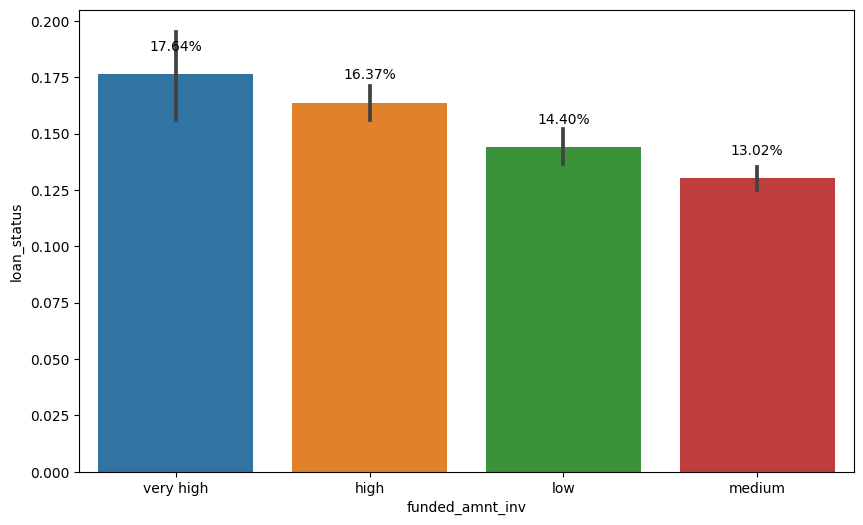

In [372]:
plot_cat('funded_amnt_inv')

In [373]:
DF4['int_rate_1'] = DF4['int_rate']

In [374]:
# lets also convert interest rate to low, medium, high

def int_rate(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=15:
        return 'medium'
    else:
        return 'high'

In [375]:
DF4['int_rate'] = DF4['int_rate'].apply(lambda x: int_rate(x))

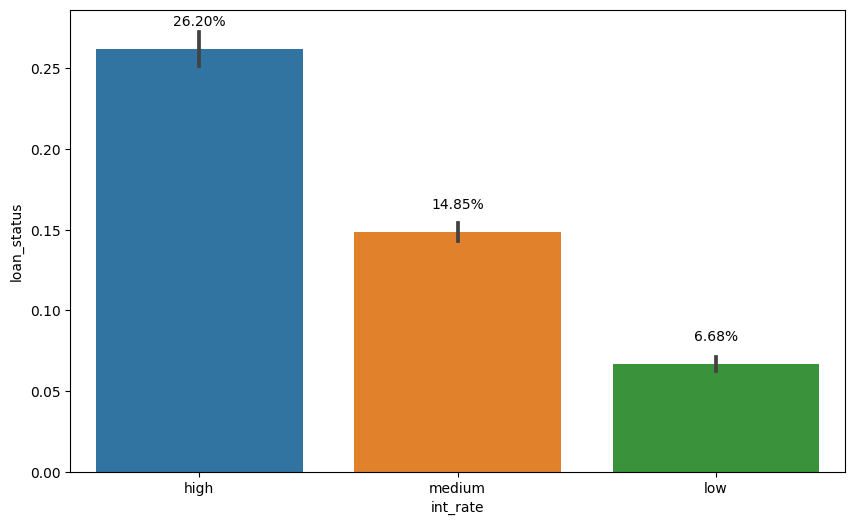

In [376]:
plot_cat('int_rate')

In [377]:
# Let's Convert dti to bins
# debt to income ratio
def dti(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=20:
        return 'medium'
    else:
        return 'high'


DF4['dti'] = DF4['dti'].apply(lambda x: dti(x))

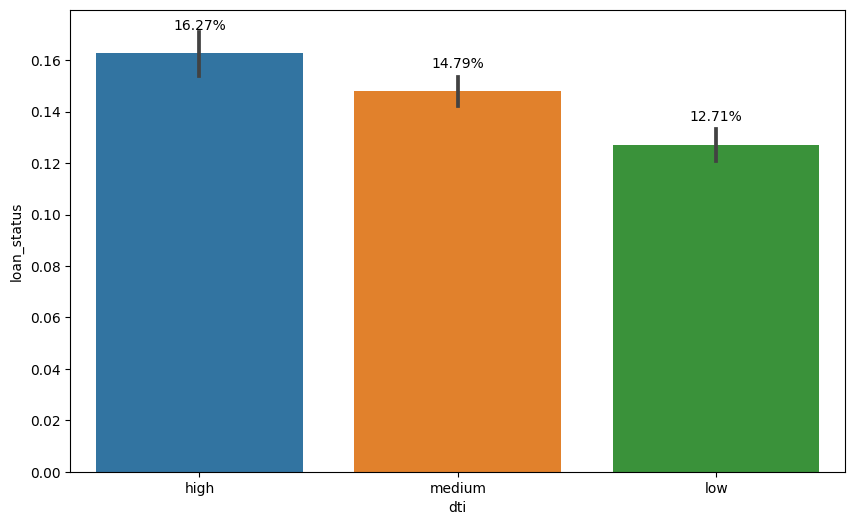

In [378]:
plot_cat('dti')

In [379]:
# funded amount
def funded_amount(n):
    if n <= 5000:
        return 'low'
    elif n > 5000 and n <=15000:
        return 'medium'
    else:
        return 'high'

DF4['funded_amnt'] = DF4['funded_amnt'].apply(lambda x: funded_amount(x))

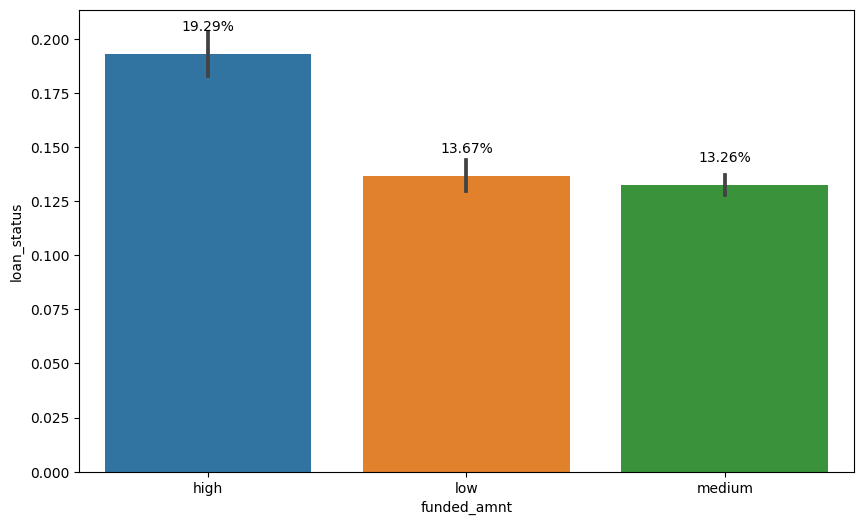

In [380]:
plot_cat('funded_amnt')

In [381]:
# installment
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=400:
        return 'medium'
    elif n > 400 and n <=600:
        return 'high'
    else:
        return 'very high'

DF4['installment'] = DF4['installment'].apply(lambda x: installment(x))

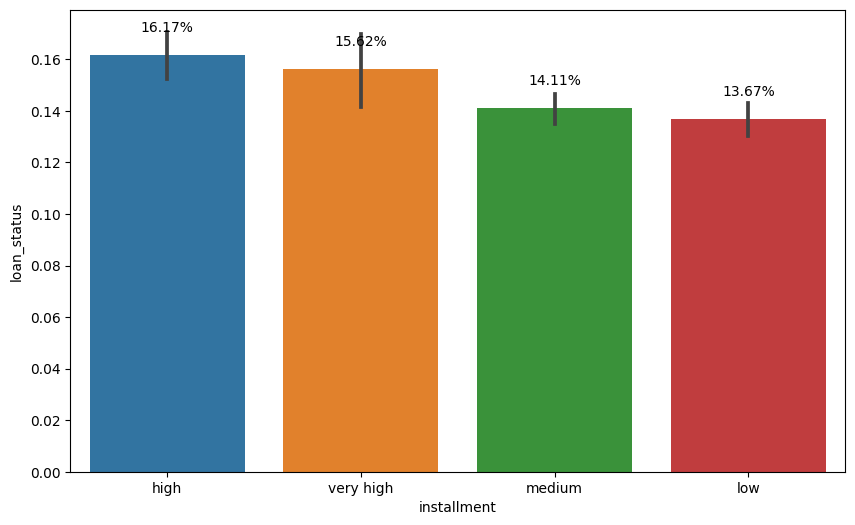

In [382]:
plot_cat('installment')

In [383]:
# annual income
def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'

DF4['annual_inc'] = DF4['annual_inc'].apply(lambda x: annual_income(x))

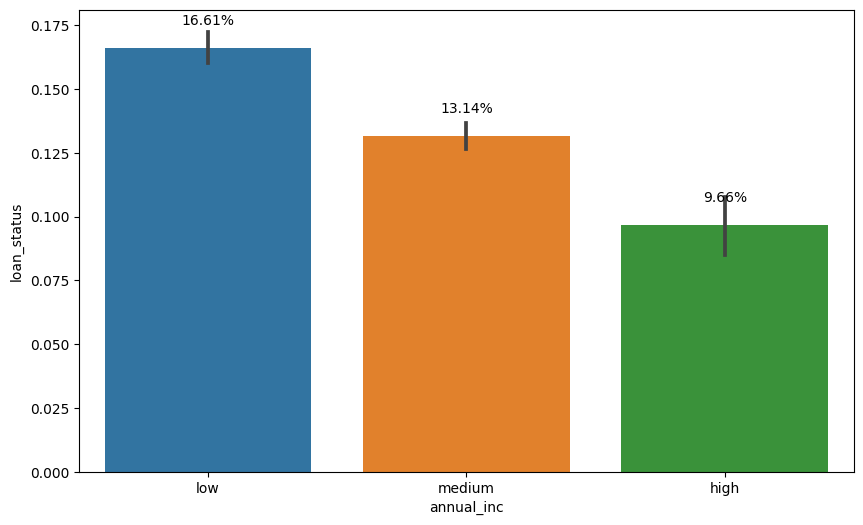

In [384]:
plot_cat('annual_inc')

In [385]:
# binning the variable
def emp_length(n):
    if n <= 1:
        return 'fresher'
    elif n > 1 and n <=3:
        return 'junior'
    elif n > 3 and n <=7:
        return 'senior'
    else:
        return 'expert'

DF4['emp_length'] = DF4['emp_length'].apply(lambda x: emp_length(x))

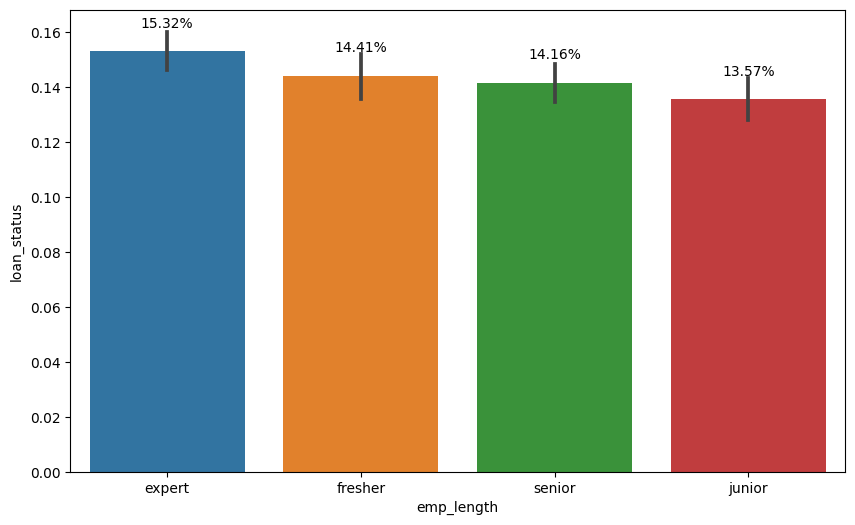

In [386]:
plot_cat('emp_length')

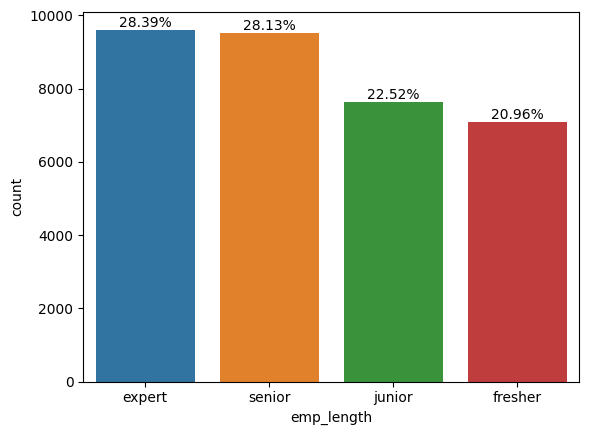

In [387]:
c=sns.countplot(x='emp_length',order=DF4['emp_length'].value_counts().index, data=DF4);
rel_values = DF4['emp_length'].value_counts(ascending=False, normalize=True).values * 100
lbls= [f'{p[0]:1.2f}%' for p in zip(rel_values)]
c.bar_label(container= c.containers[0], labels=lbls)
plt.show()

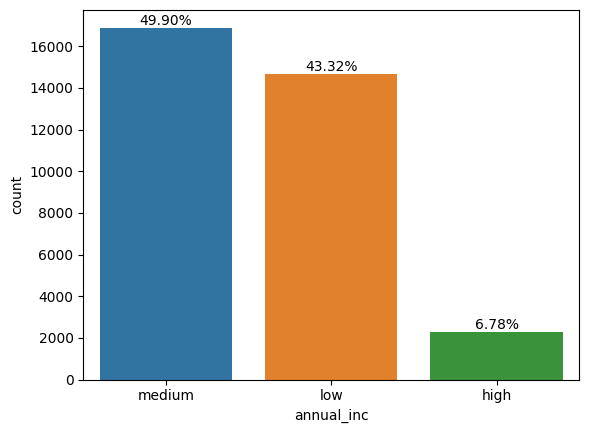

In [388]:
c=sns.countplot(x='annual_inc',order=DF4['annual_inc'].value_counts().index, data=DF4);
rel_values = DF4['annual_inc'].value_counts(ascending=False, normalize=True).values * 100
lbls= [f'{p[0]:1.2f}%' for p in zip(rel_values)]
c.bar_label(container= c.containers[0], labels=lbls)
plt.show()

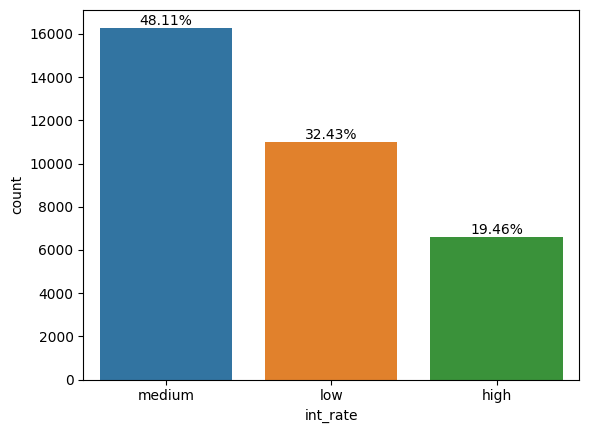

In [389]:
c=sns.countplot(x='int_rate',order=DF4['int_rate'].value_counts().index, data=DF4);
rel_values = DF4['int_rate'].value_counts(ascending=False, normalize=True).values * 100
lbls= [f'{p[0]:1.2f}%' for p in zip(rel_values)]
c.bar_label(container= c.containers[0], labels=lbls)
plt.show()

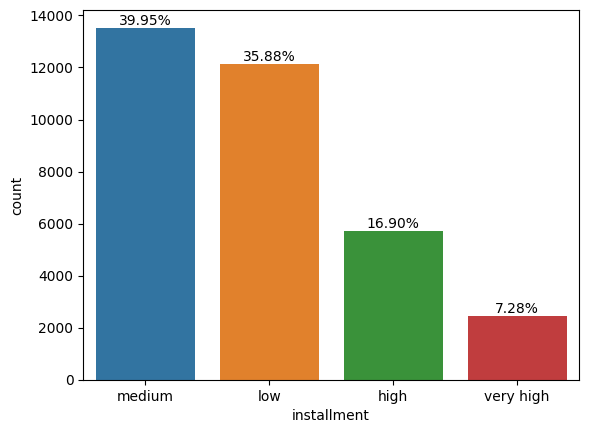

In [390]:

c=sns.countplot(x='installment',order=DF4['installment'].value_counts().index, data=DF4);
rel_values = DF4['installment'].value_counts(ascending=False, normalize=True).values * 100
lbls= [f'{p[0]:1.2f}%' for p in zip(rel_values)]
c.bar_label(container= c.containers[0], labels=lbls)
plt.show()

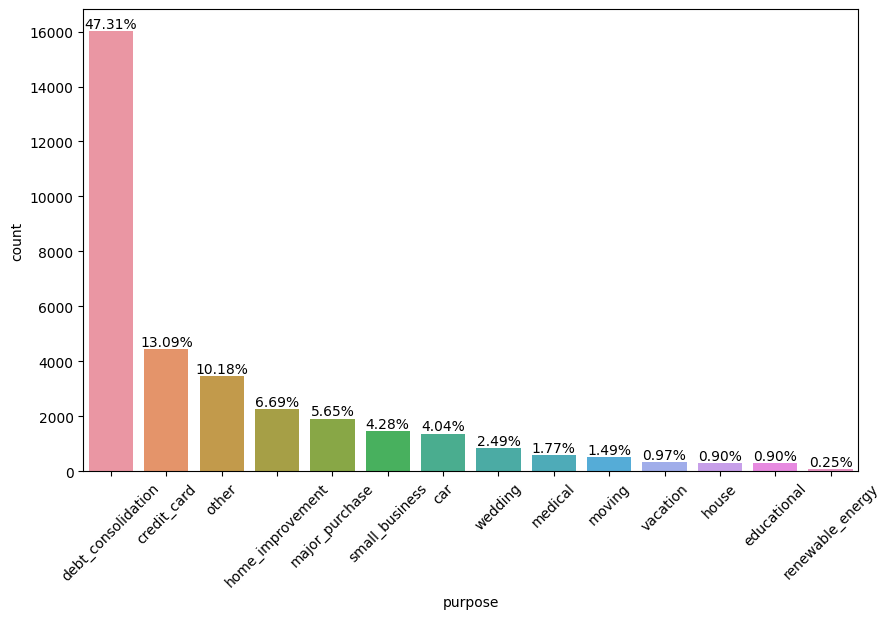

In [391]:
plt.figure(figsize=(10, 6))
c=sns.countplot(x='purpose',order=DF4['purpose'].value_counts().index, data=DF4);
rel_values = DF4['purpose'].value_counts(ascending=False, normalize=True).values * 100
lbls= [f'{p[0]:1.2f}%' for p in zip(rel_values)]
c.bar_label(container= c.containers[0], labels=lbls)
plt.xticks(rotation = 45)
plt.show()

# Segmented Univariate Analysis

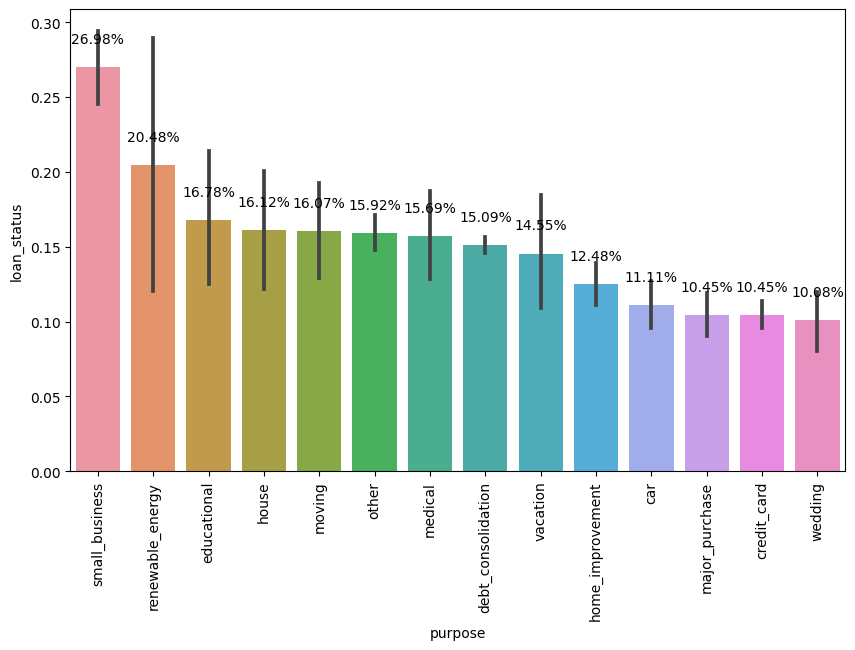

In [392]:
plot_cat('purpose',90)

In [393]:
#purpose: small business loans defualt the most, then renewable energy and education
#In the upcoming analyses, we will segment the loan applications across the purpose of the loan,
#since that is a variable affecting many other variables - the type of applicant, interest rate, income, and finally the default rate.

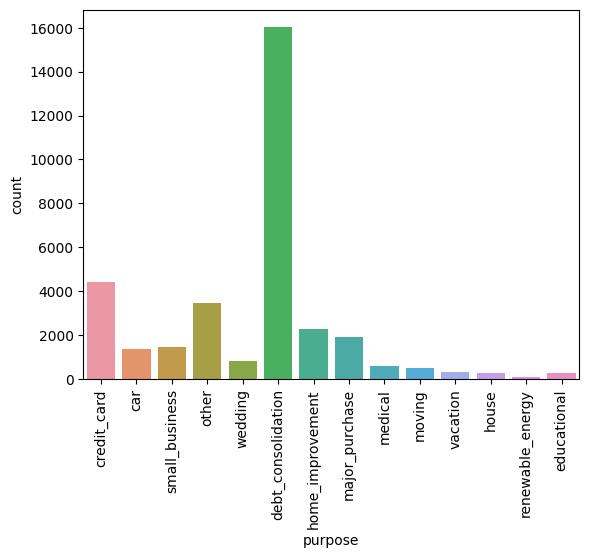

In [394]:
# Let's check number of loans for each purpose type
sns.countplot(x='purpose', data=DF4)
plt.xticks(rotation = 90)
plt.show()

Let's analyse the top 5 types of loans based on purpose: consolidation, credit card,other , home improvement and major purchase.

In [395]:
# filtering the df for the 5 types of loans mentioned above
main_purposes = ["credit_card","debt_consolidation","home_improvement","major_purchase" , "other"]
DF4 = DF4[DF4['purpose'].isin(main_purposes)]
DF4['purpose'].value_counts()

debt_consolidation    16020
credit_card            4432
other                  3448
home_improvement       2267
major_purchase         1913
Name: purpose, dtype: int64

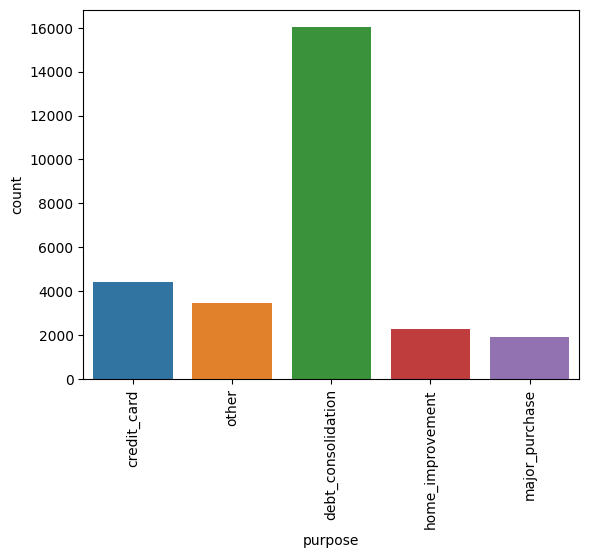

In [396]:
# plotting number of loans by purpose
sns.countplot(x=DF4['purpose'])
plt.xticks(rotation =90)
plt.show()

let's now compare the default rates across two types of categorical variables

In [397]:
def Plot_Two_Cat(Cat_var1 , Cat_Var2 = 'purpose', rotate=0 , labelRotation = 0):
  plt.figure(figsize=[10, 6])


  c = sns.barplot(
        x=Cat_var1,
        y='loan_status',
        hue=Cat_Var2,
        data=DF4
    )

  for container in c.containers:
        for bar in container:
            height = bar.get_height()
            c.annotate(
                f'{height * 100:.2f}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 35),
                rotation=labelRotation,
                textcoords="offset points",
                ha='center',
                va='bottom'
            )

  plt.xticks(rotation=rotate)
  plt.show()

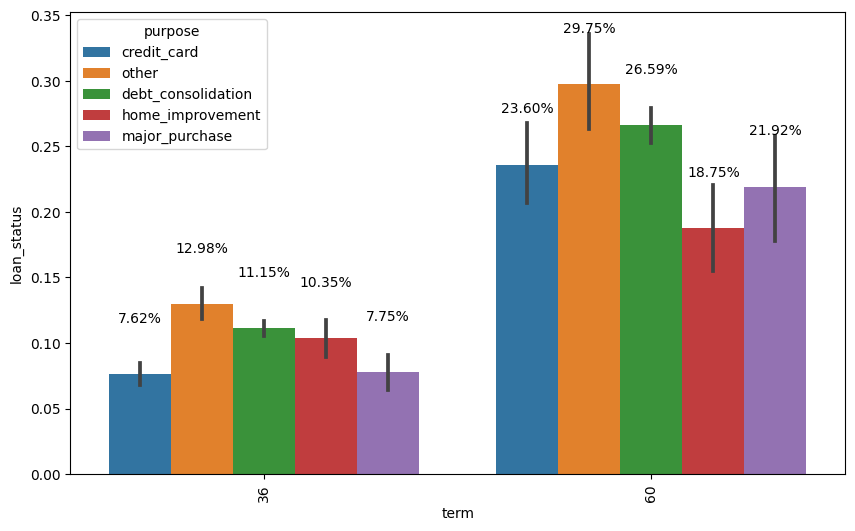

In [398]:
Plot_Two_Cat('term' , 'purpose' , 90)

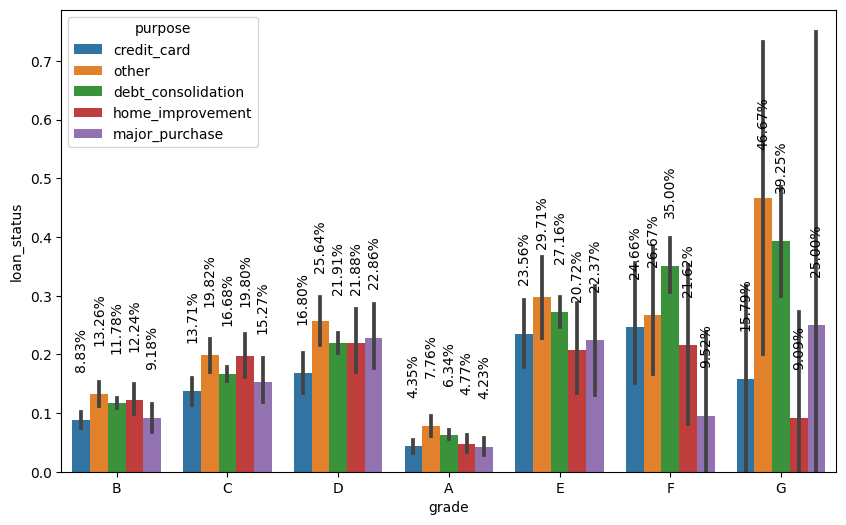

In [399]:
Plot_Two_Cat('grade' , 'purpose' , labelRotation = 90)

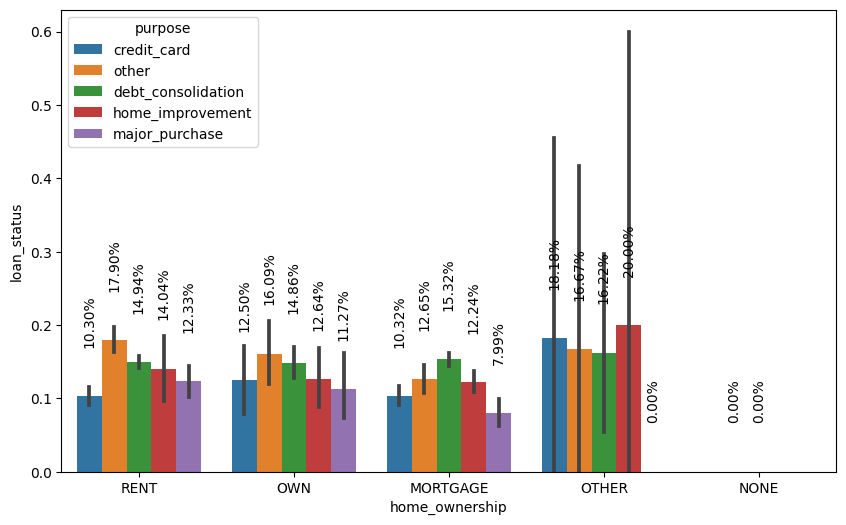

In [400]:
# home ownership
Plot_Two_Cat('home_ownership', labelRotation = 90)

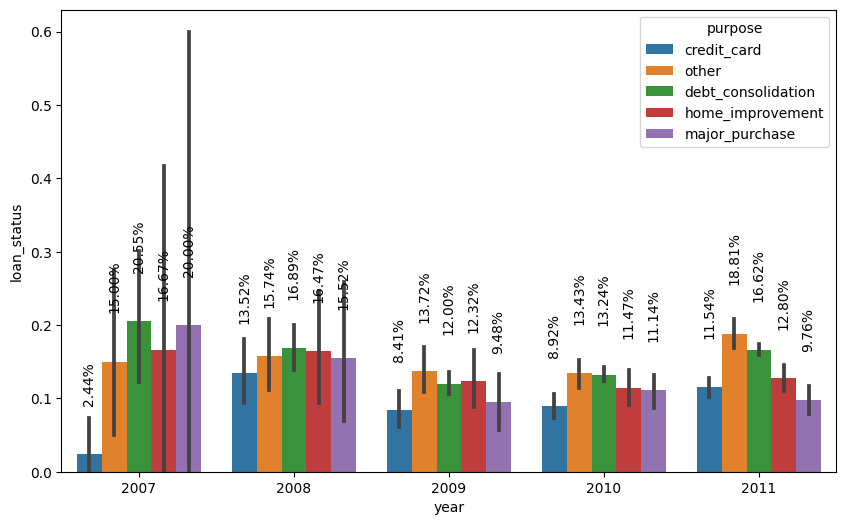

In [401]:
# year
Plot_Two_Cat('year', labelRotation = 90)

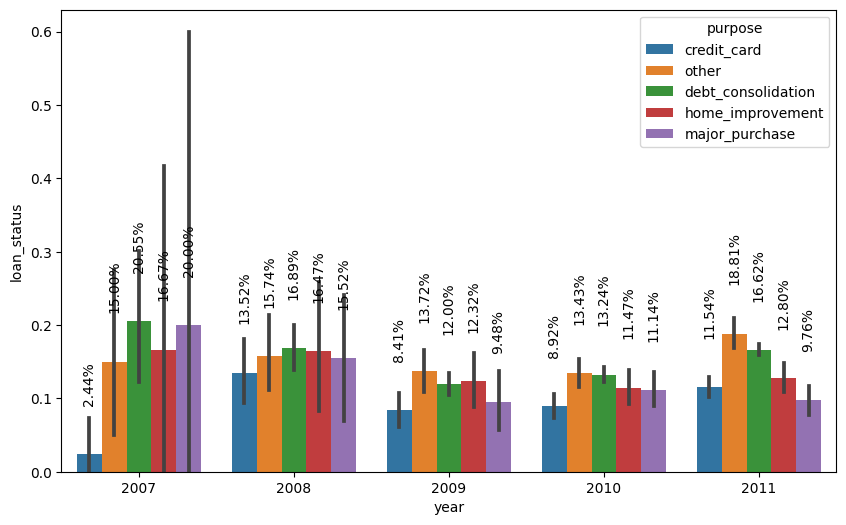

In [402]:
# month
Plot_Two_Cat('year', labelRotation = 90)

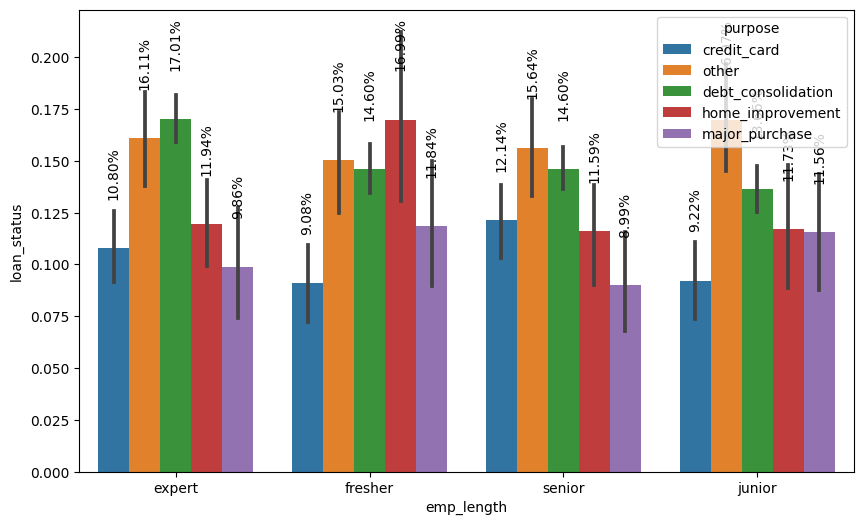

In [403]:
Plot_Two_Cat('emp_length', labelRotation = 90)

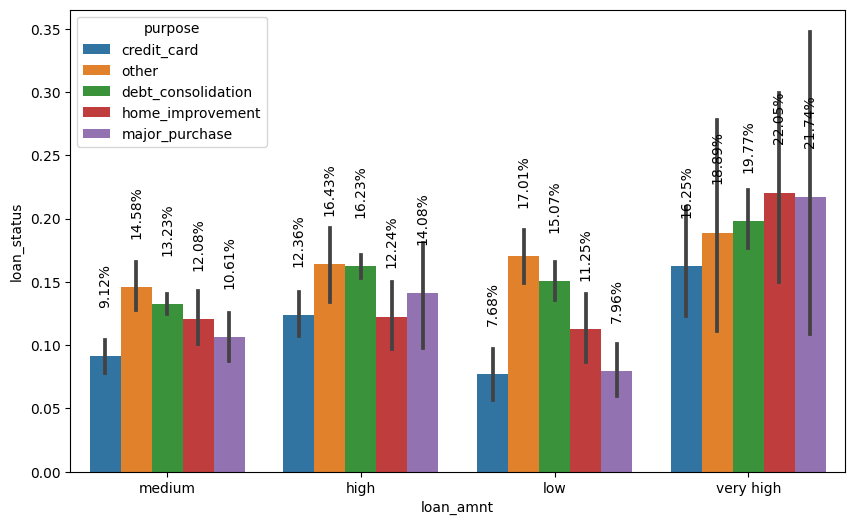

In [404]:
Plot_Two_Cat('loan_amnt', labelRotation = 90)

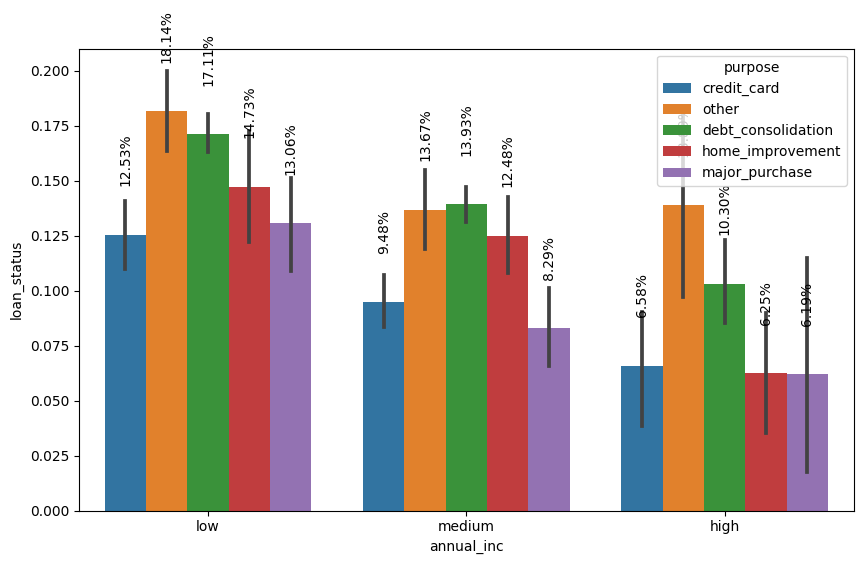

In [405]:
Plot_Two_Cat('annual_inc', labelRotation = 90)

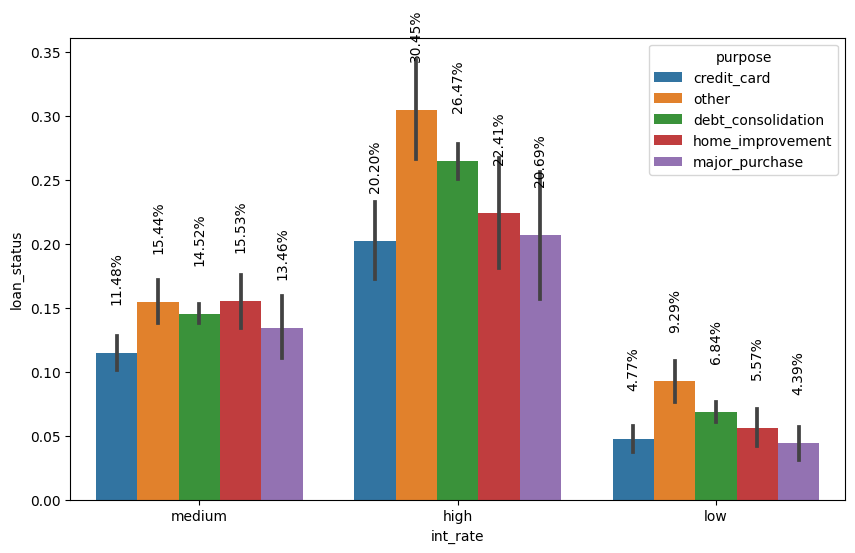

In [406]:
Plot_Two_Cat('int_rate', labelRotation = 90)

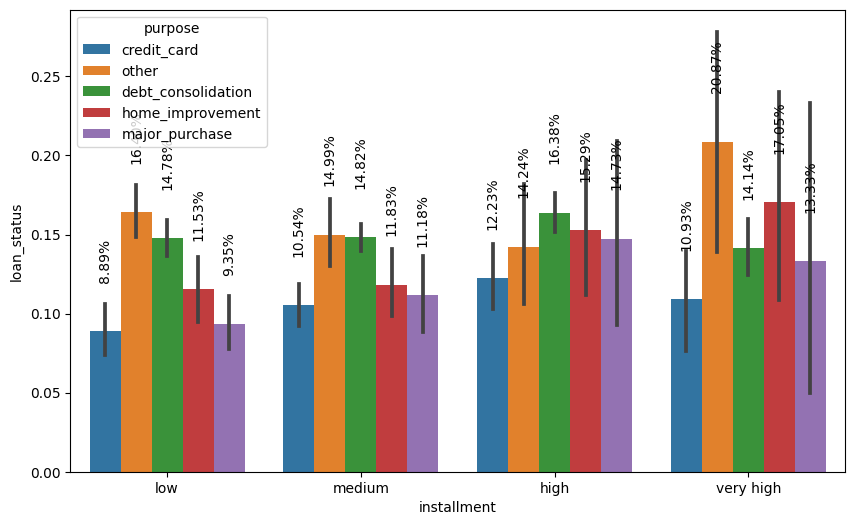

In [407]:
Plot_Two_Cat('installment', labelRotation = 90)

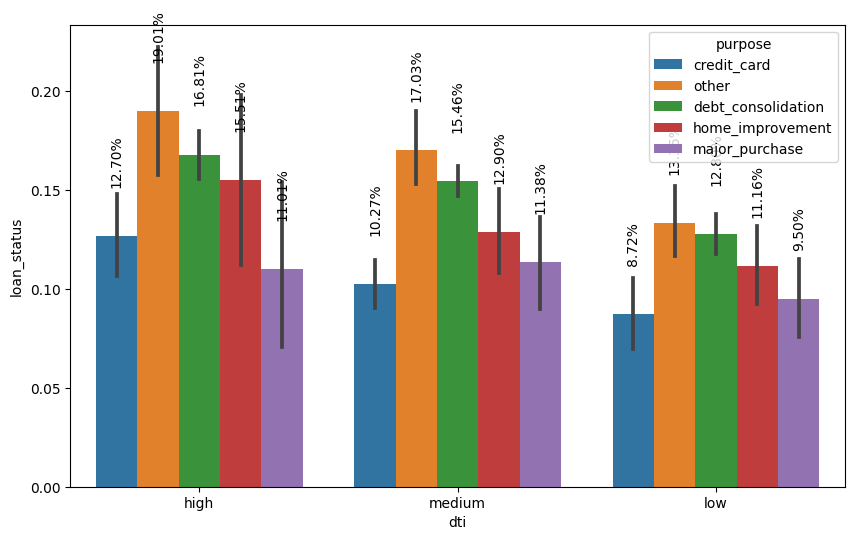

In [408]:
Plot_Two_Cat('dti', labelRotation = 90)

A good way to quantify the effect of a categorical variable on default rate is to see 'how much does the default rate vary across the categories'.

In [409]:
# Let's write a function which takes in a categorical variable and computed the average default rate across the categories
# It can also compute the 'difference between the highest and the lowest default rate' across the
# categories, which is a decent metric indicating the effect of the varaible on default rate

In [410]:
def diff_rate(cat_var):
    default_rates = DF4.groupby(cat_var).loan_status.mean().sort_values(ascending=False)
    return (round(default_rates, 2), round(default_rates[0] - default_rates[-1], 2))

In [411]:
default_rates, diff = diff_rate('annual_inc')
print('Default Rates are : ',default_rates)
print('The Difference is : ',diff)

Default Rates are :  annual_inc
low       0.16
medium    0.13
high      0.09
Name: loan_status, dtype: float64
The Difference is :  0.07


In [412]:
DF4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28080 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             28080 non-null  object        
 1   funded_amnt           28080 non-null  object        
 2   funded_amnt_inv       28080 non-null  object        
 3   term                  28080 non-null  int64         
 4   int_rate              28080 non-null  object        
 5   installment           28080 non-null  object        
 6   grade                 28080 non-null  object        
 7   sub_grade             28080 non-null  object        
 8   emp_title             27302 non-null  object        
 9   emp_length            28080 non-null  object        
 10  home_ownership        28080 non-null  object        
 11  annual_inc            28080 non-null  object        
 12  verification_status   28080 non-null  object        
 13  issue_d         

In [413]:
# filtering all the object type variables
df_categorical = DF4.loc[:, DF4.dtypes == object]
df_categorical['loan_status'] = DF4['loan_status']

In [414]:
# storing the diff of default rates for each column in a dict
d = {key: diff_rate(key)[1]*100 for key in df_categorical.columns if key != 'loan_status'}
print(d)

{'loan_amnt': 7.000000000000001, 'funded_amnt': 6.0, 'funded_amnt_inv': 5.0, 'int_rate': 19.0, 'installment': 2.0, 'grade': 28.999999999999996, 'sub_grade': 52.0, 'emp_title': 100.0, 'emp_length': 2.0, 'home_ownership': 16.0, 'annual_inc': 7.000000000000001, 'verification_status': 4.0, 'purpose': 5.0, 'dti': 4.0, 'purpose1': 5.0}


In [415]:
home_imp = DF4.groupby(by = 'purpose')['year'].value_counts()

In [416]:
home_imp

purpose             year
credit_card         2011    2358
                    2010    1278
                    2009     511
                    2008     244
                    2007      41
debt_consolidation  2011    8635
                    2010    4841
                    2009    1867
                    2008     604
                    2007      73
home_improvement    2011    1180
                    2010     706
                    2009     284
                    2008      85
                    2007      12
major_purchase      2011     912
                    2010     727
                    2009     211
                    2008      58
                    2007       5
other               2011    1473
                    2010    1184
                    2009     554
                    2008     197
                    2007      40
Name: year, dtype: int64

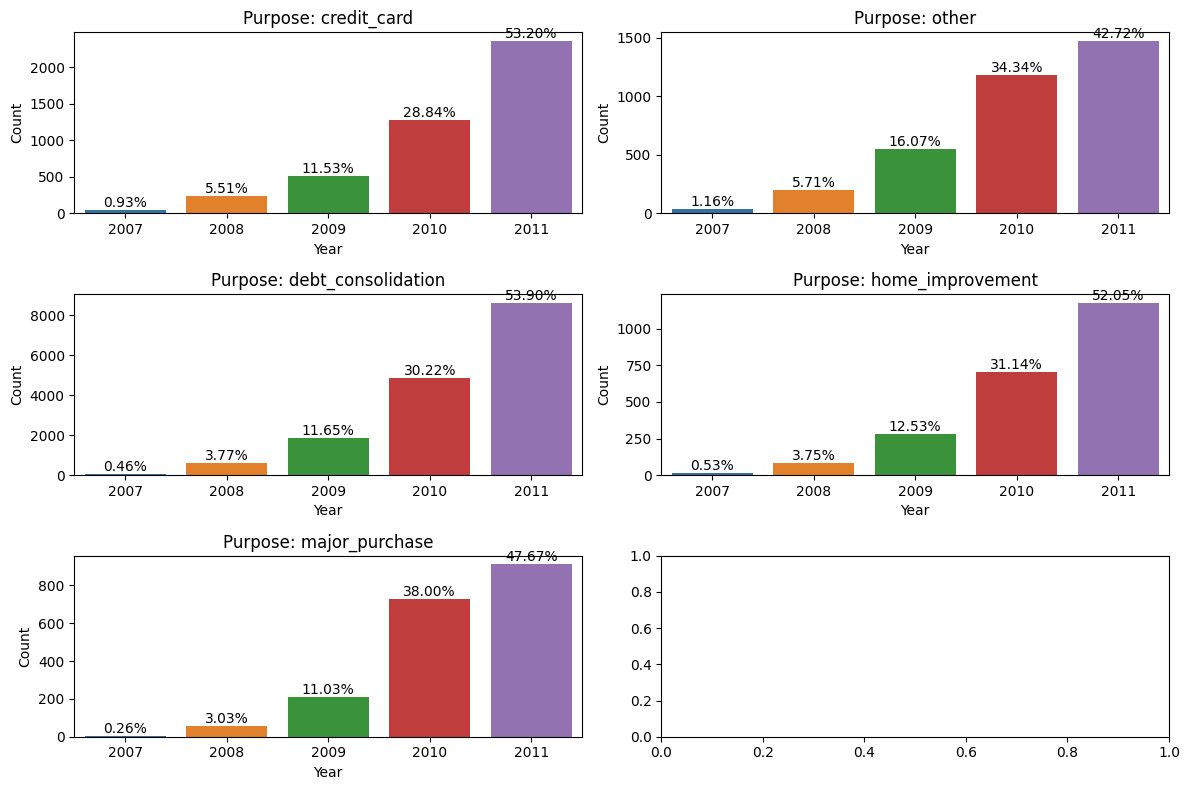

In [417]:
unique_purposes = DF4['purpose'].unique()
fig, axes = plt.subplots(3, 2, figsize=(12, 8))
axes = axes.flatten()
for i, purpose in enumerate(unique_purposes):
    ax = axes[i]
    purpose_data = home_imp[purpose]
    total_count = purpose_data.sum()

    sns.barplot(x=purpose_data.index, y=purpose_data.values, ax=ax)

    # Adding percentage values as bar labels
    for p in ax.patches:
        percentage = p.get_height() / total_count * 100
        ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

    ax.set_title(f'Purpose: {purpose}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

In [443]:

unique_purposes_list = unique_purposes.tolist()
unique_purposes_list.remove('other')
unique_purposes_list

['credit_card', 'debt_consolidation', 'home_improvement', 'major_purchase']

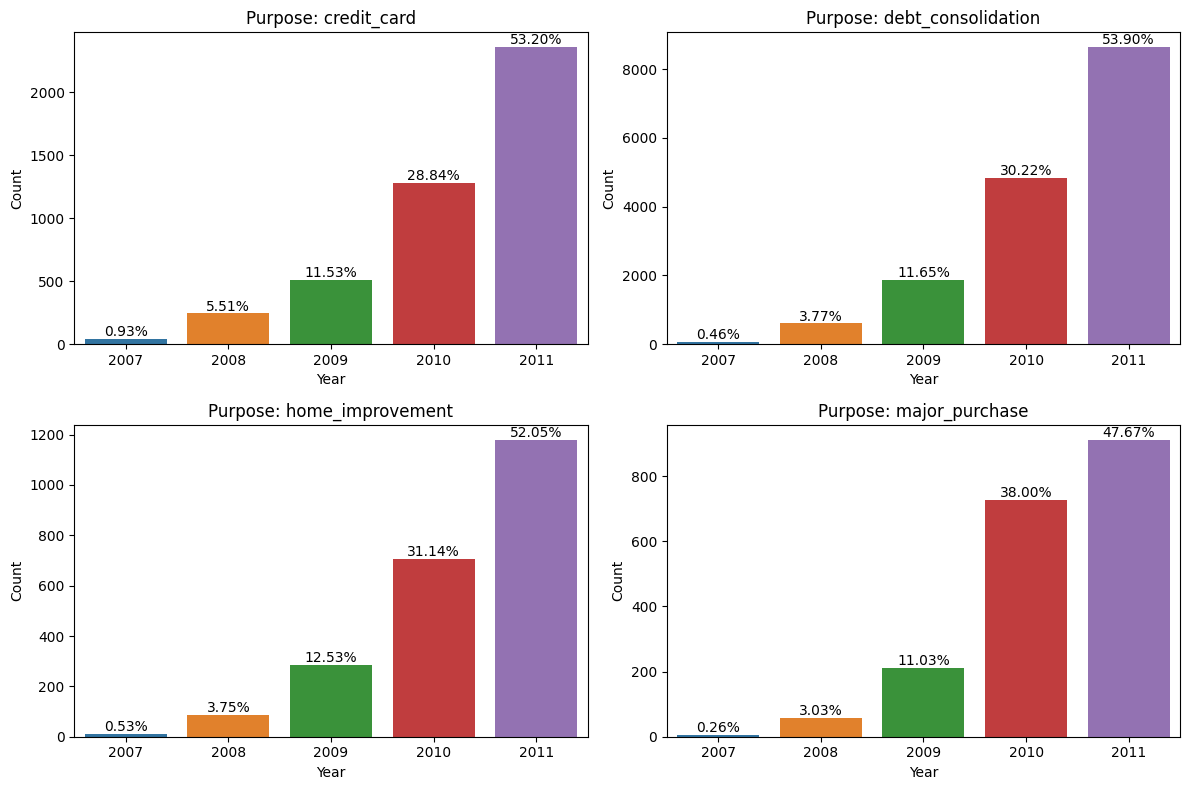

In [444]:
#unique_purposes = DF4['purpose'].unique()

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()
for i, purpose in enumerate(unique_purposes_list):
    ax = axes[i]
    purpose_data = home_imp[purpose]
    total_count = purpose_data.sum()

    sns.barplot(x=purpose_data.index, y=purpose_data.values, ax=ax)

    # Adding percentage values as bar labels
    for p in ax.patches:
        percentage = p.get_height() / total_count * 100
        ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

    ax.set_title(f'Purpose: {purpose}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

In [418]:
term_imp = DF4.groupby(by = 'purpose')['term'].value_counts()
term_imp

purpose             term
credit_card         36       3648
                    60        784
debt_consolidation  36      11932
                    60       4088
home_improvement    36       1691
                    60        576
major_purchase      36       1548
                    60        365
other               36       2843
                    60        605
Name: term, dtype: int64

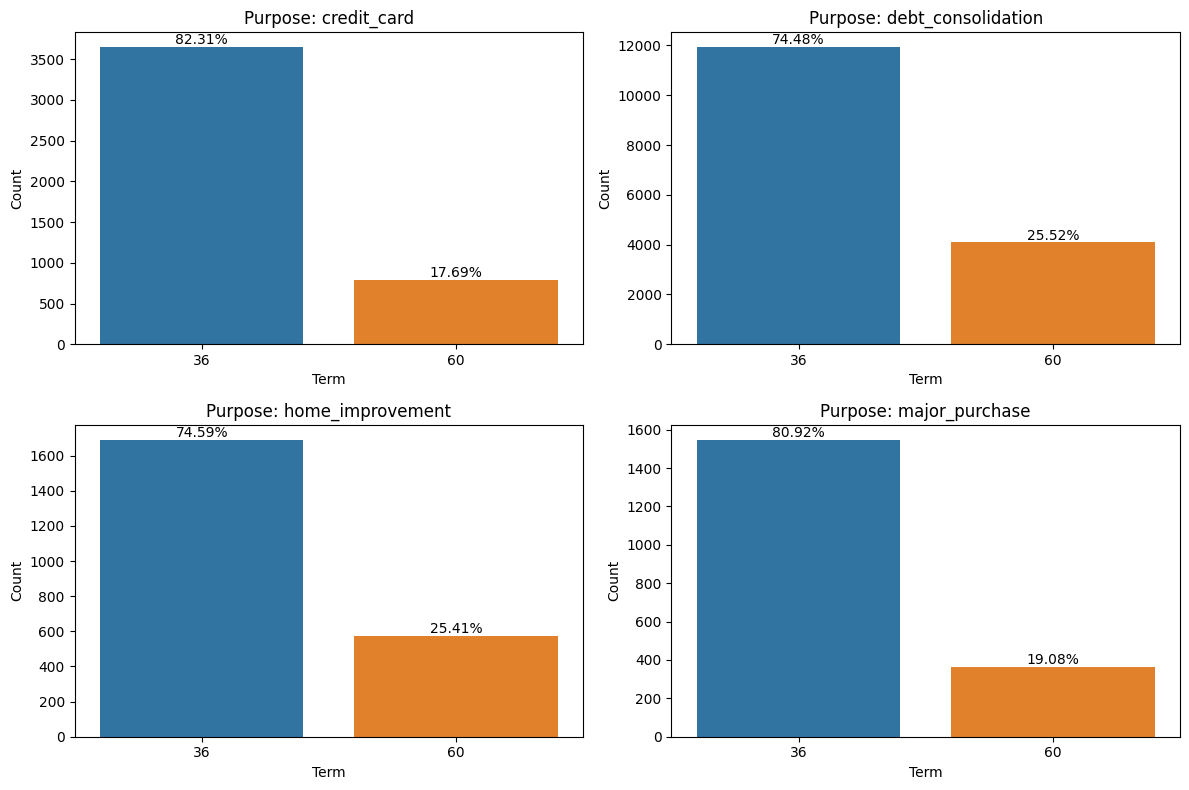

In [446]:

#unique_purposes = DF4['purpose'].unique()
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()
for i, purpose in enumerate(unique_purposes_list):
    ax = axes[i]
    purpose_data = term_imp[purpose]
    total_count = purpose_data.sum()

    sns.barplot(x=purpose_data.index, y=purpose_data.values, ax=ax)

    # Adding percentage values as bar labels
    for p in ax.patches:
        percentage = p.get_height() / total_count * 100
        ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

    ax.set_title(f'Purpose: {purpose}')
    ax.set_xlabel('Term')
    ax.set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

In [420]:
grade_imp = DF4.groupby(by = 'purpose')['grade'].value_counts()
grade_imp

purpose             grade
credit_card         B        1449
                    A        1263
                    C         926
                    D         494
                    E         208
                    F          73
                    G          19
debt_consolidation  B        4941
                    A        3517
                    C        3448
                    D        2405
                    E        1182
                    F         420
                    G         107
home_improvement    A         797
                    B         678
                    C         409
                    D         224
                    E         111
                    F          37
                    G          11
major_purchase      A         732
                    B         523
                    C         347
                    D         210
                    E          76
                    F          21
                    G           4
other               B 

In [421]:
unique_purposes = DF4['purpose'].unique()
unique_purposes

array(['credit_card', 'other', 'debt_consolidation', 'home_improvement',
       'major_purchase'], dtype=object)

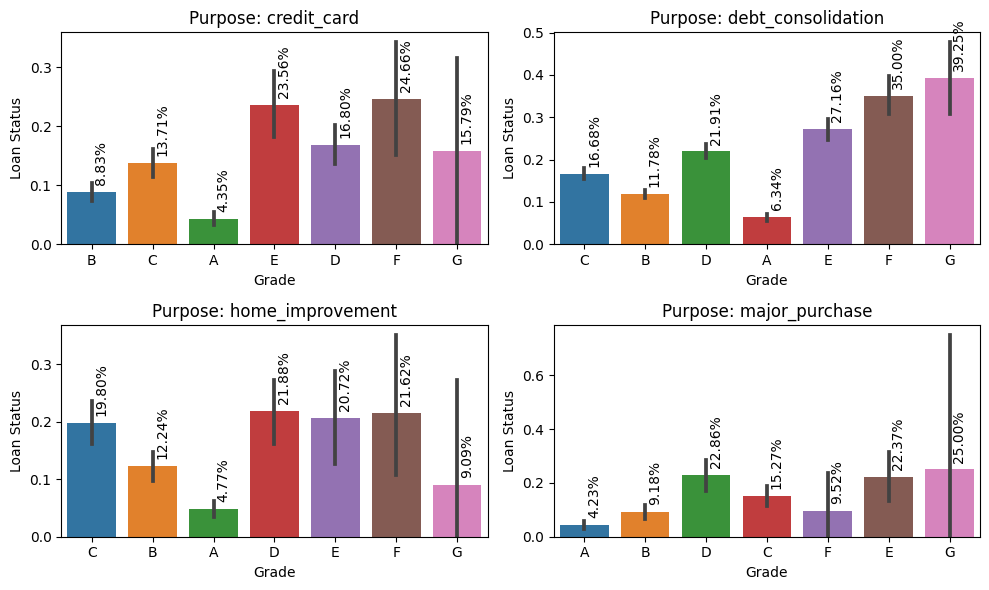

In [452]:
plt.figure(figsize=[10, 6])

unique_purposes = ['credit_card', 'debt_consolidation', 'home_improvement','major_purchase']
num_rows = 2
num_cols =2
for i, purpose in enumerate(unique_purposes):
    ax = plt.subplot(num_rows, num_cols, i + 1)
    purpose_data = DF4[DF4['purpose'] == purpose]
    c = sns.barplot(
        x='grade',
        y='loan_status',
        data=purpose_data
    )

    for container in c.containers:
        for bar in container:
            height = bar.get_height()
            c.annotate(
                f'{height * 100:.2f}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(7, 5),
                rotation=90,
                textcoords="offset points",
                ha='center',
                va='bottom'
            )

    plt.title(f'Purpose: {purpose}')
    plt.xlabel('Grade')
    plt.ylabel('Loan Status')

plt.tight_layout()
plt.show()

In [423]:
def PurposeWise(Cat_var):
  plt.figure(figsize=[10, 10])

  unique_purposes = ['credit_card', 'debt_consolidation', 'home_improvement','major_purchase']
  num_rows = 2
  num_cols =2
  for i, purpose in enumerate(unique_purposes):
      ax = plt.subplot(num_rows, num_cols, i + 1)
      purpose_data = DF4[DF4['purpose'] == purpose]
      c = sns.barplot(
          x=Cat_var,
          y='loan_status',
          data=purpose_data
      )

      for container in c.containers:
          for bar in container:
              height = bar.get_height()
              c.annotate(
                  f'{height * 100:.2f}%',
                  xy=(bar.get_x() + bar.get_width() / 2, height),
                  xytext=(0, 35),
                  rotation=90,
                  textcoords="offset points",
                  ha='center',
                  va='bottom'
              )

      plt.title(f'Purpose: {purpose}')
      plt.xlabel(Cat_var)
      plt.ylabel('Loan Status')

  plt.tight_layout()
  plt.show()

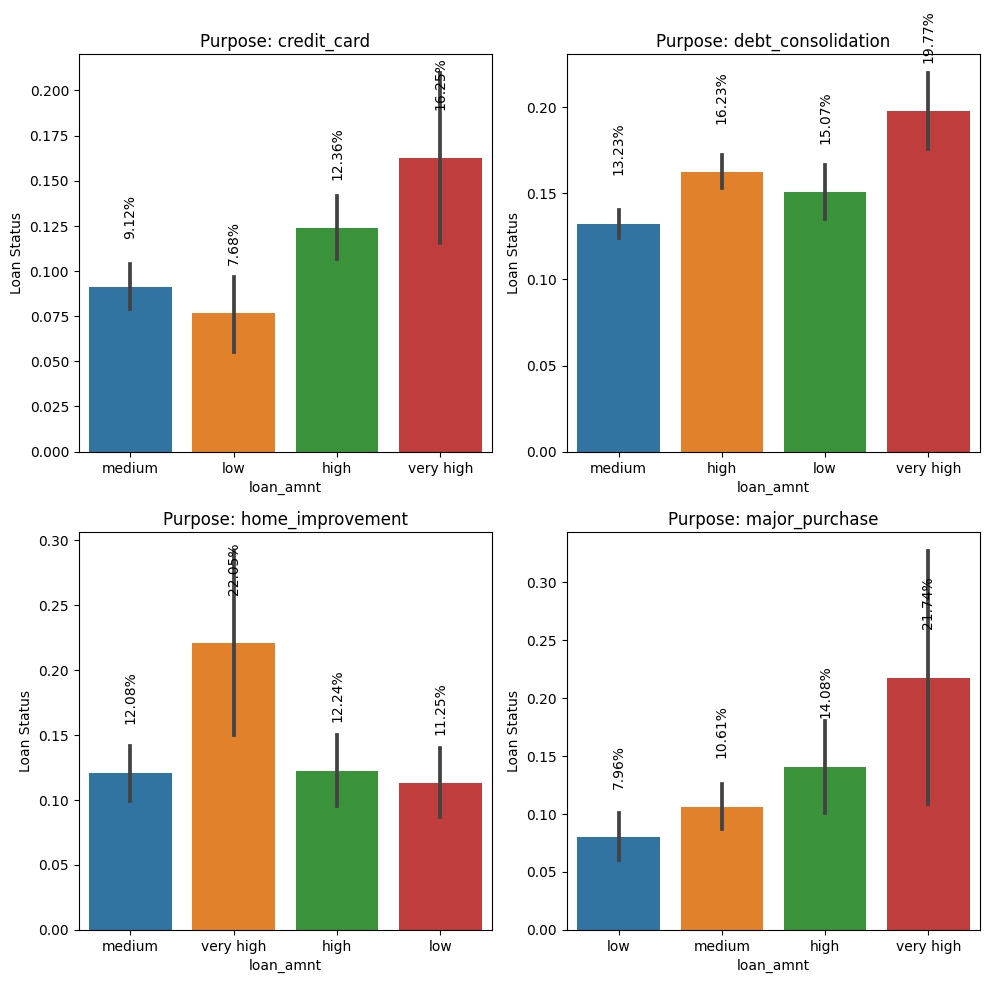

In [424]:
PurposeWise('loan_amnt')

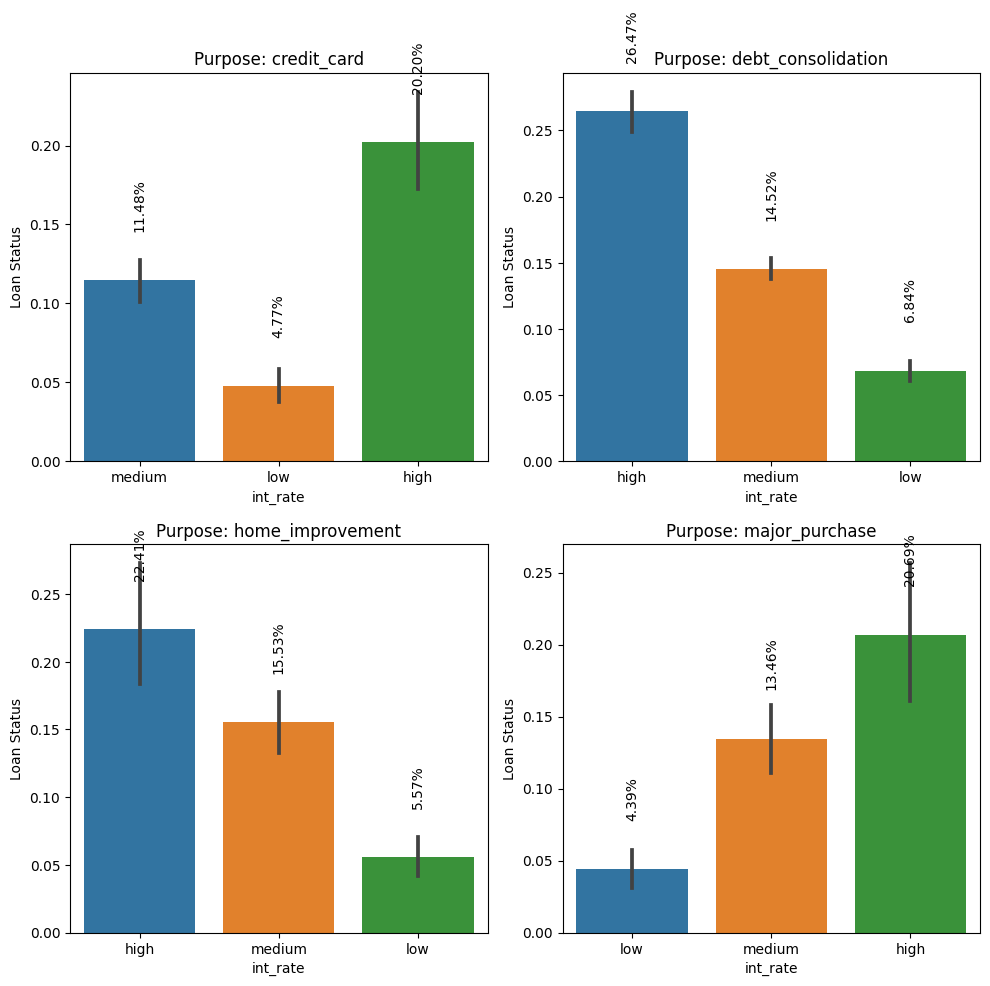

In [425]:
PurposeWise('int_rate')

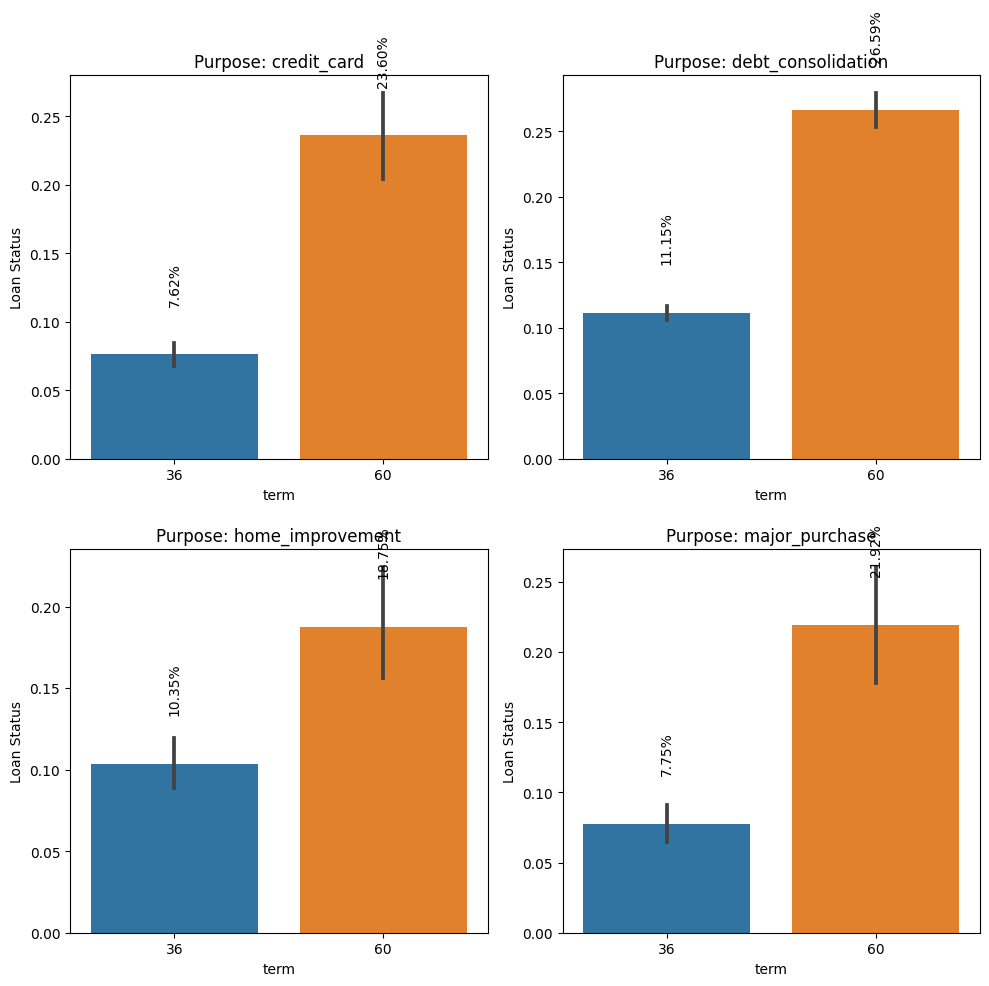

In [426]:
PurposeWise('term')

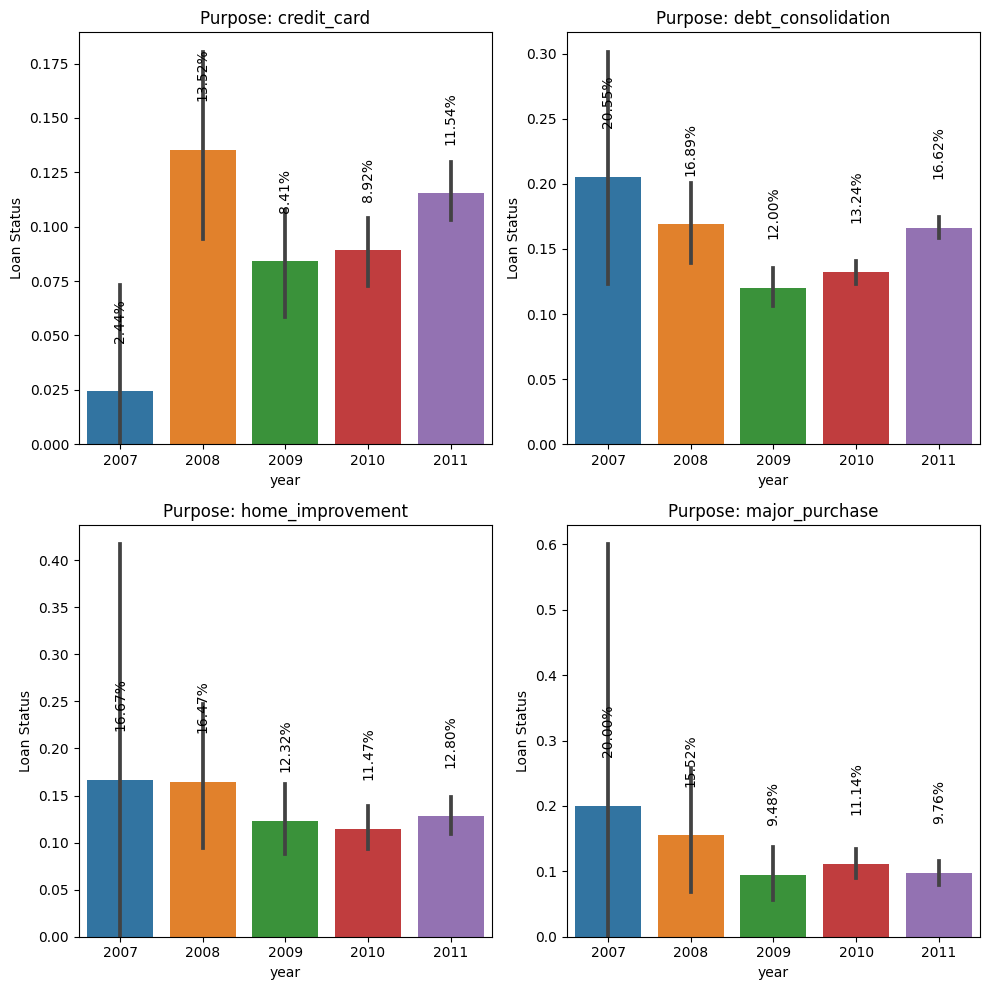

In [427]:
PurposeWise('year')

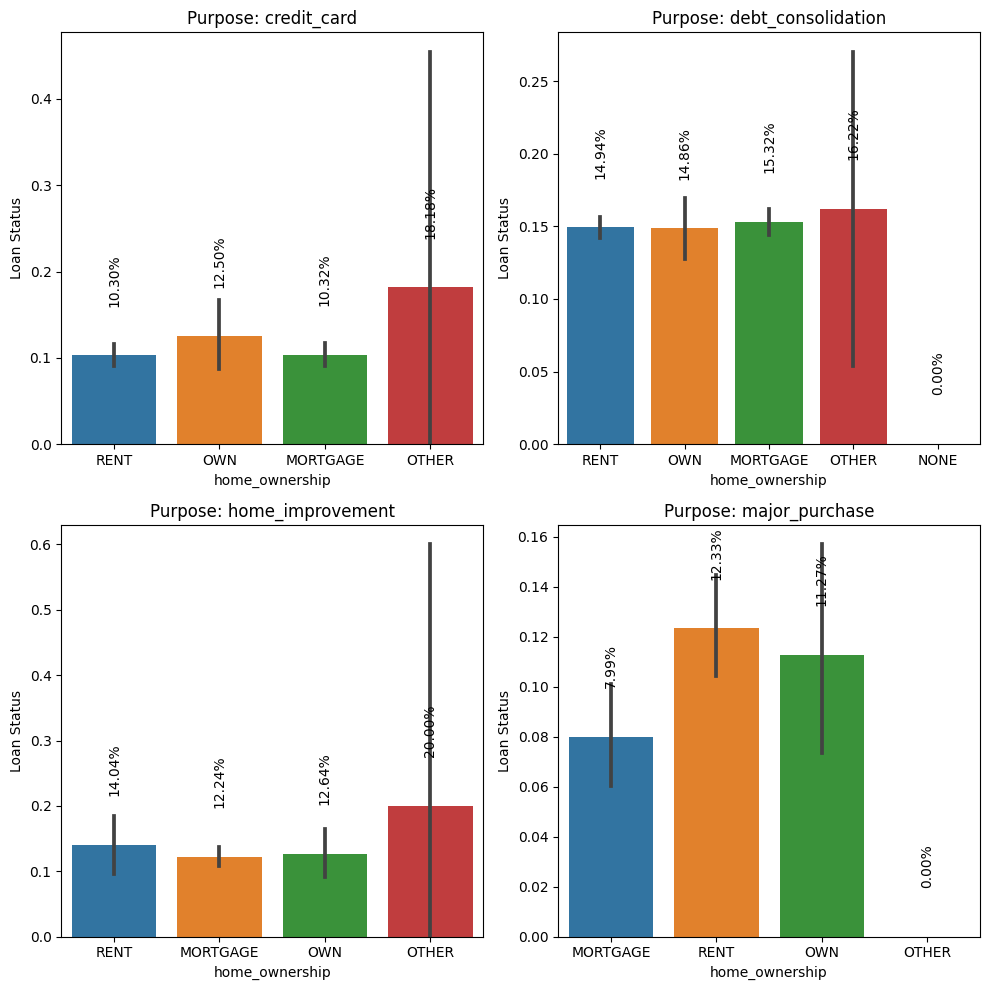

In [428]:
PurposeWise('home_ownership')

In [429]:
imp_var_list = ['grade' , 'term' , 'int_rate' , 'year' , 'home_ownership' , 'loan_amnt' , 'funded_amnt' , 'annual_inc' , 'dti' , 'verification_status' , 'emp_length' , 'installment']

In [430]:
DF4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28080 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             28080 non-null  object        
 1   funded_amnt           28080 non-null  object        
 2   funded_amnt_inv       28080 non-null  object        
 3   term                  28080 non-null  int64         
 4   int_rate              28080 non-null  object        
 5   installment           28080 non-null  object        
 6   grade                 28080 non-null  object        
 7   sub_grade             28080 non-null  object        
 8   emp_title             27302 non-null  object        
 9   emp_length            28080 non-null  object        
 10  home_ownership        28080 non-null  object        
 11  annual_inc            28080 non-null  object        
 12  verification_status   28080 non-null  object        
 13  issue_d         

5
0.2465753424657534
[0 1 2 3 4 5 6]
['B', 'C', 'A', 'E', 'D', 'F', 'G']
max_value at  F
5
0.4666666666666667
[0 1 2 3 4 5 6]
['C', 'B', 'D', 'A', 'E', 'G', 'F']
max_value at  G
6
0.3925233644859813
[0 1 2 3 4 5 6]
['C', 'B', 'D', 'A', 'E', 'F', 'G']
max_value at  G
3
0.21875
[0 1 2 3 4 5 6]
['C', 'B', 'A', 'D', 'E', 'F', 'G']
max_value at  D
6
0.25
[0 1 2 3 4 5 6]
['A', 'B', 'D', 'C', 'F', 'E', 'G']
max_value at  G
1
0.23596938775510204
[0 1]
['36', '60']
max_value at  60
1
0.2975206611570248
[0 1]
['36', '60']
max_value at  60
1
0.26590019569471623
[0 1]
['36', '60']
max_value at  60
1
0.1875
[0 1]
['36', '60']
max_value at  60
1
0.2191780821917808
[0 1]
['36', '60']
max_value at  60
2
0.2020497803806735
[0 1 2]
['medium', 'low', 'high']
max_value at  high
1
0.3044982698961938
[0 1 2]
['medium', 'high', 'low']
max_value at  high
0
0.2647466075879258
[0 1 2]
['high', 'medium', 'low']
max_value at  high
0
0.22413793103448276
[0 1 2]
['high', 'medium', 'low']
max_value at  high
2
0.2068

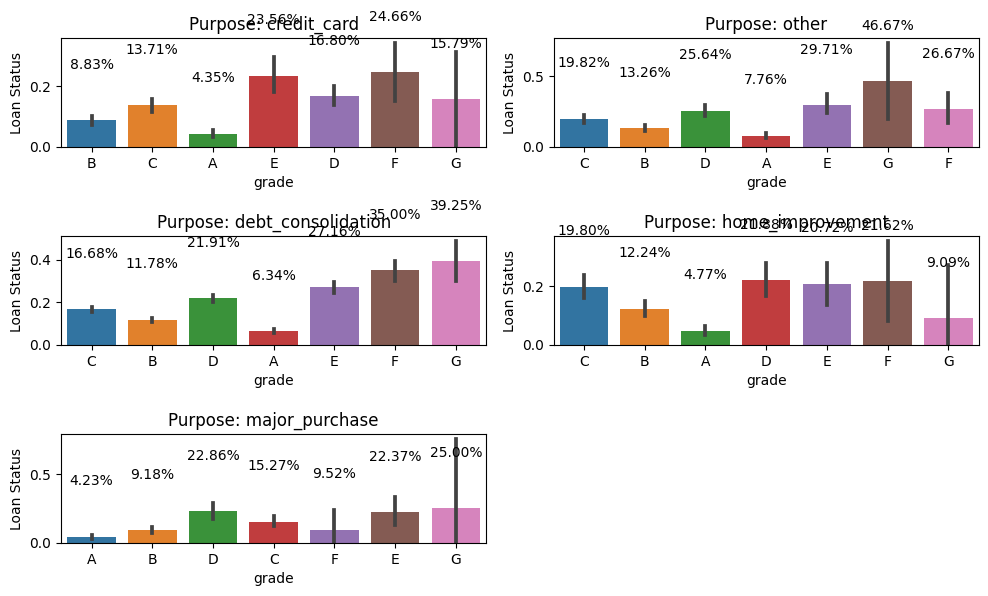

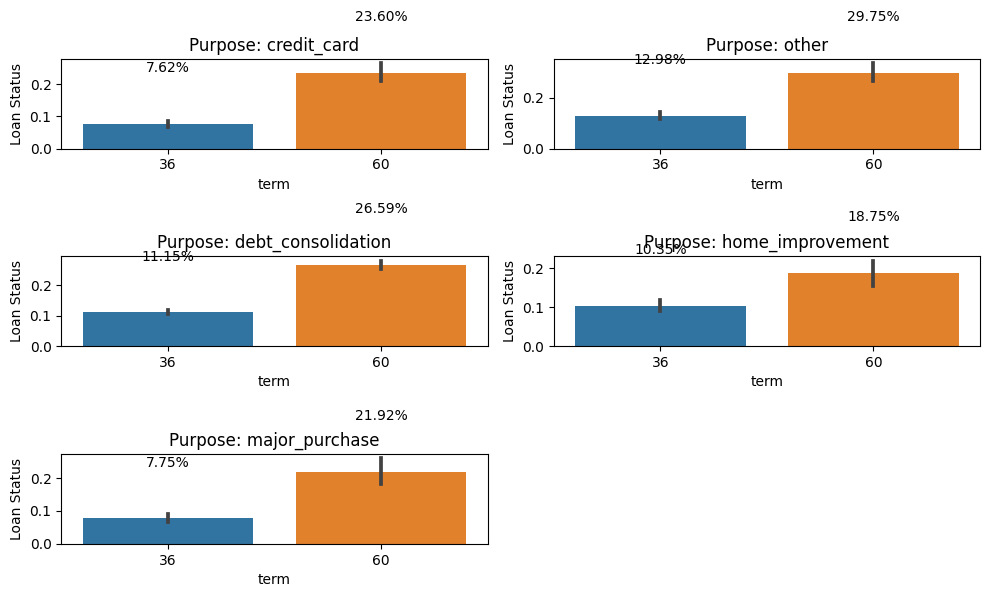

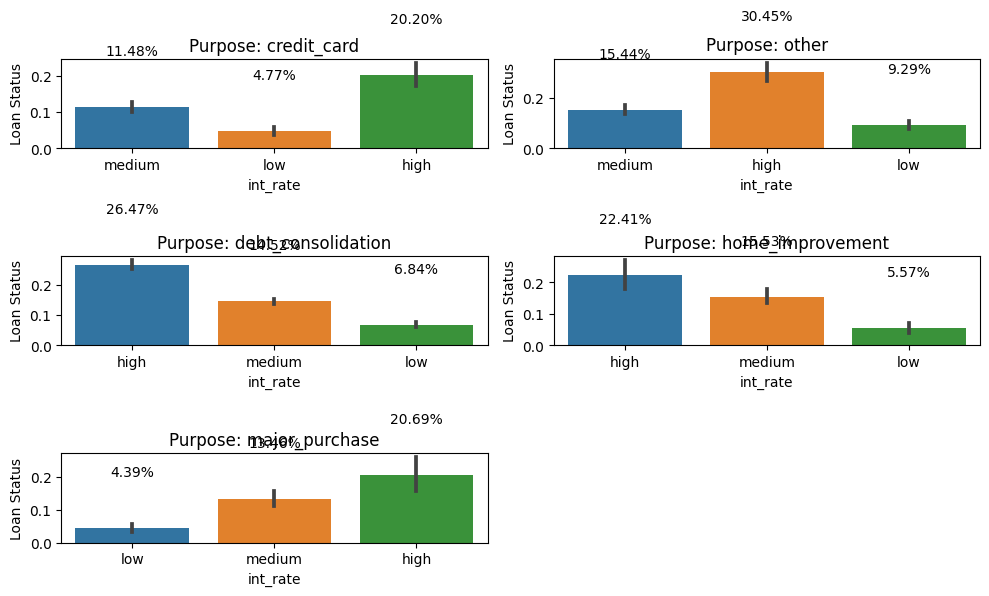

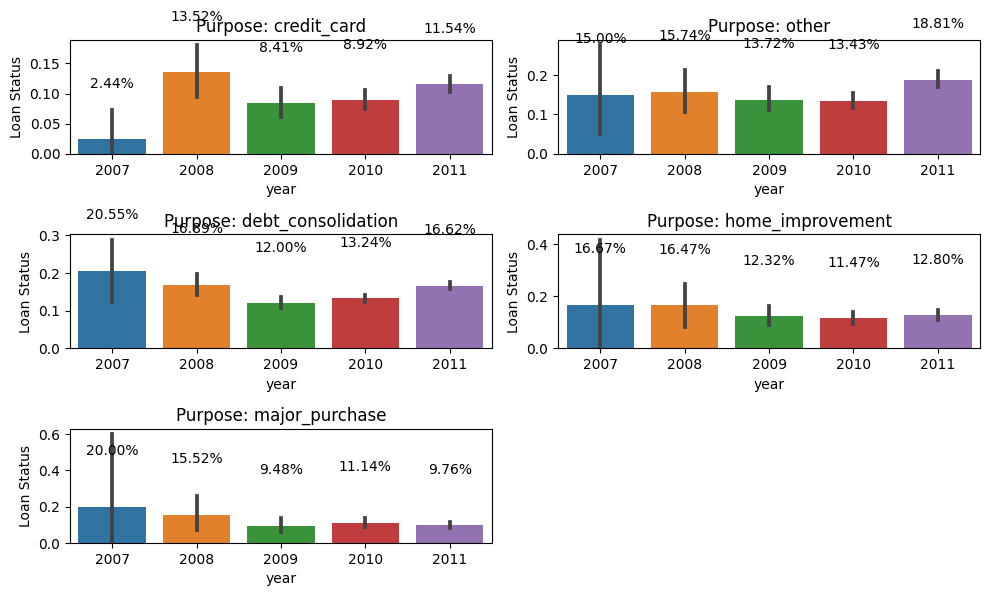

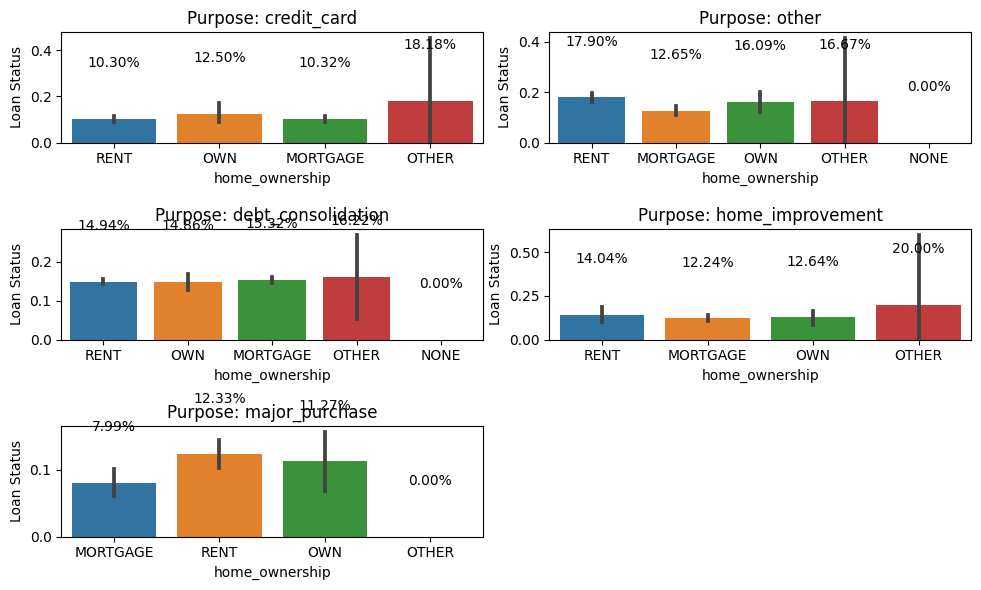

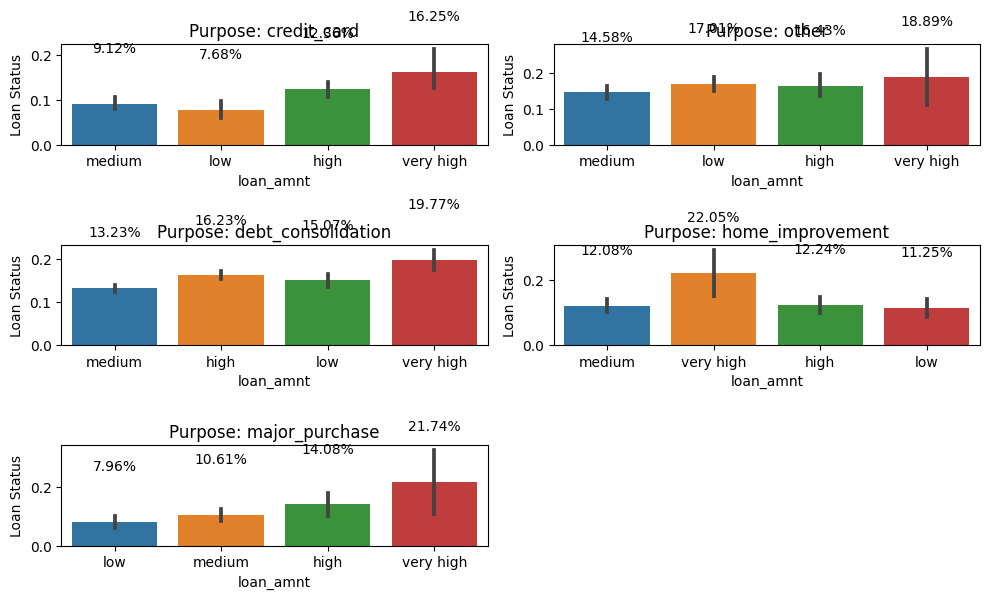

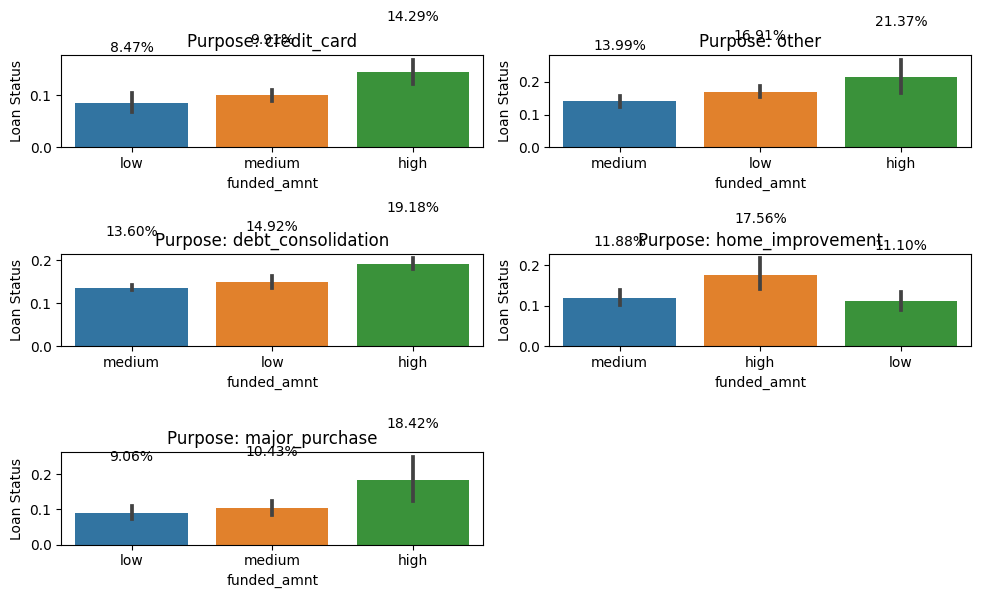

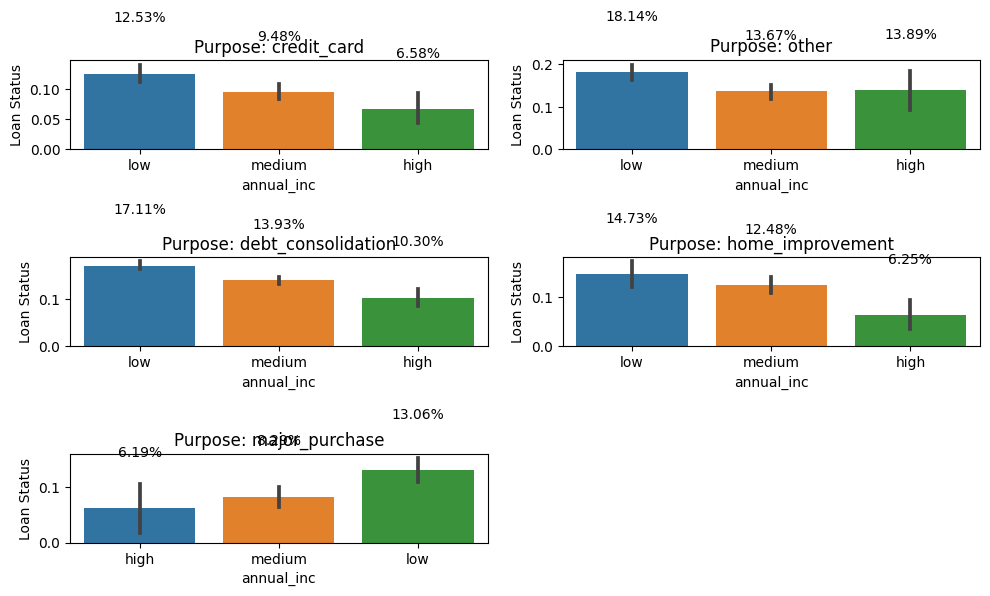

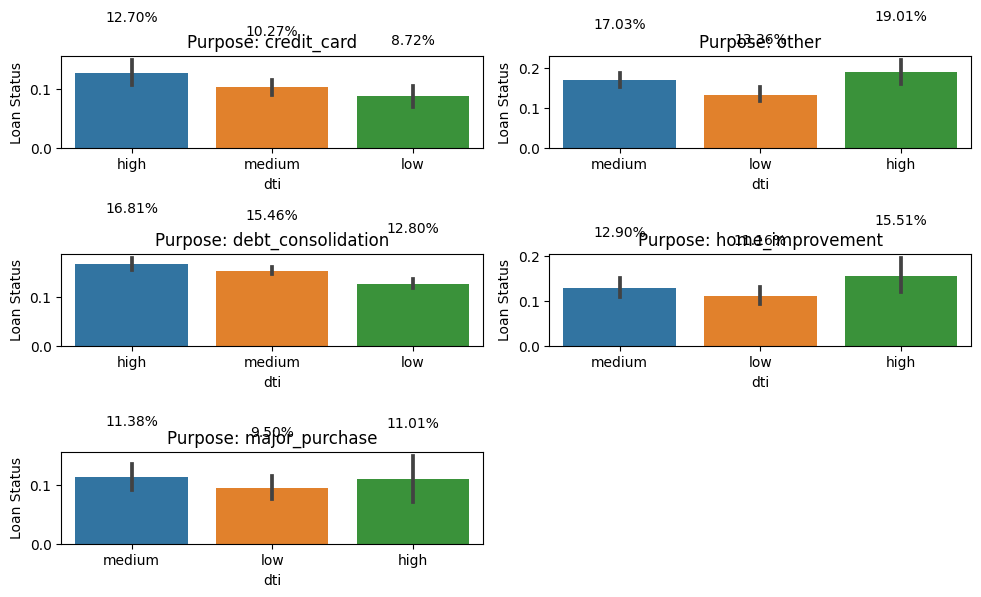

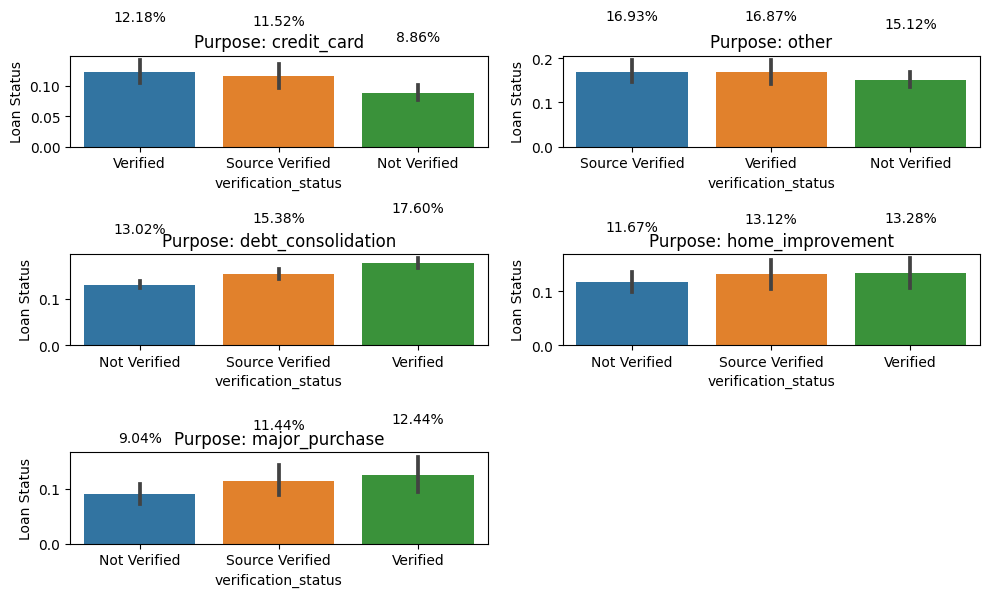

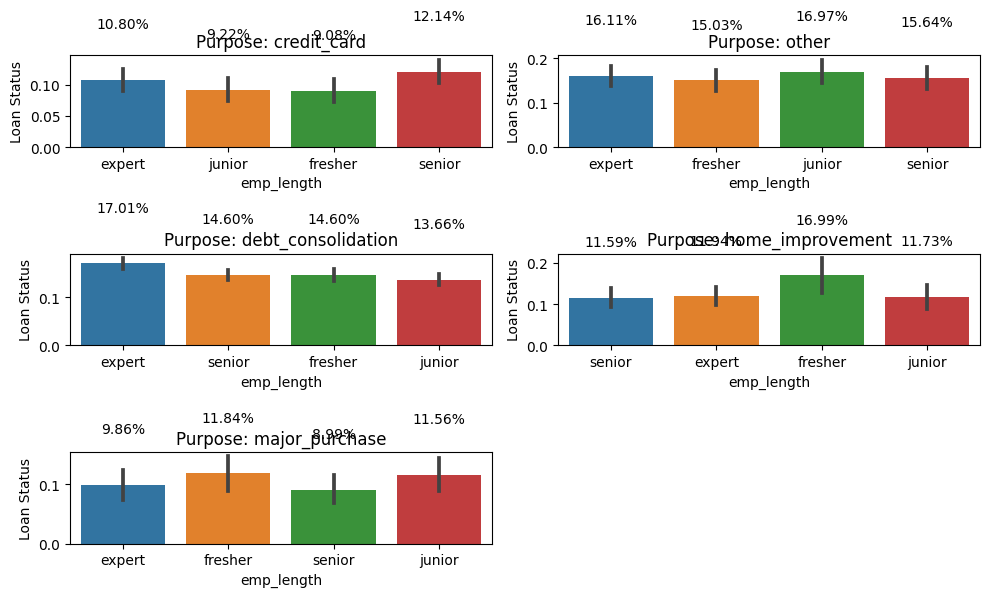

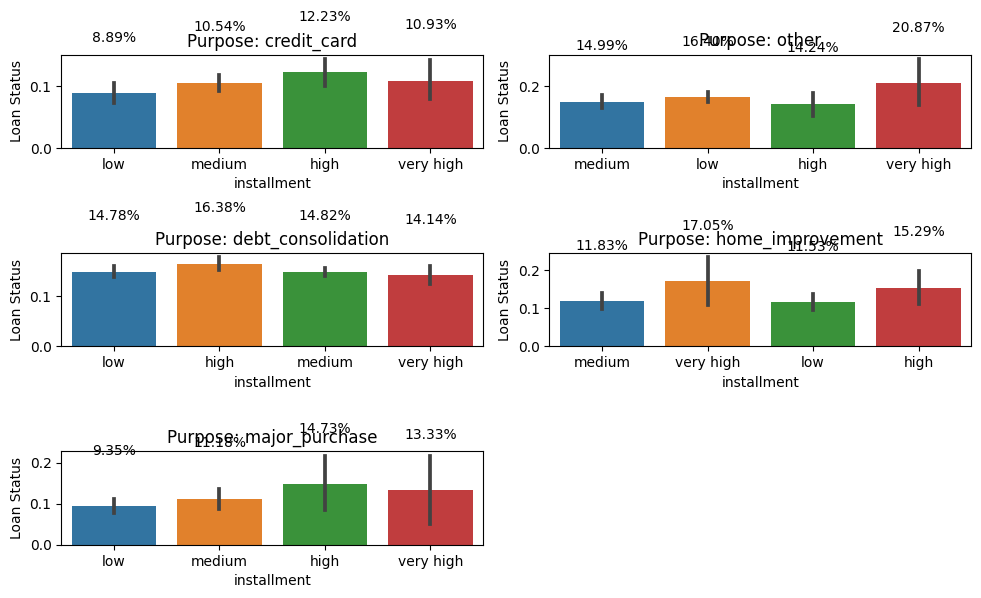

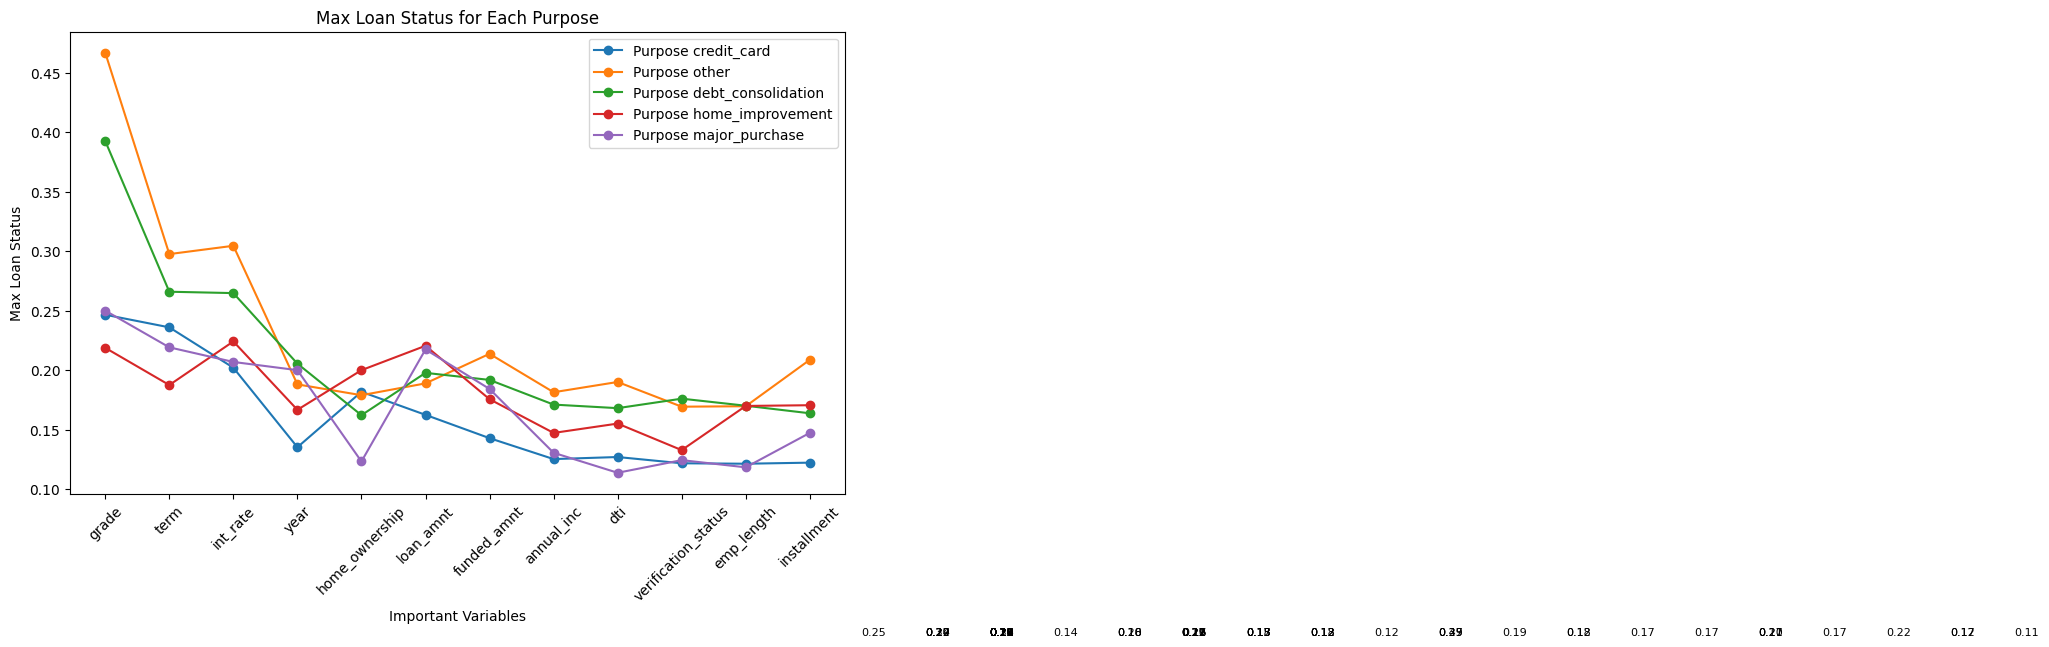

In [431]:
max_values_by_purpose = {}  # Dictionary to store max values for each purpose

def Plot_Two_Cat(Cat_var1, Cat_Var2='purpose', rotate=0, labelRotation=0, num_rows=1, num_cols=2):
    plt.figure(figsize=[10, 6])

    unique_purposes = DF4[Cat_Var2].unique()

    for i, purpose in enumerate(unique_purposes):
        ax = plt.subplot(num_rows, num_cols, i + 1)
        purpose_data = DF4[DF4[Cat_Var2] == purpose]
        c = sns.barplot(
            x=Cat_var1,
            y='loan_status',
            data=purpose_data
        )

        xtick_positions = ax.get_xticks()  # Get xtick positions
        xtick_labels = [tick.get_text() for tick in ax.get_xticklabels()]  # Get xtick labels

        max_height_dict = {}
        for j, container in enumerate(c.containers):
            for k, bar in enumerate(container):
                height = bar.get_height()
                xtick_label = xtick_positions[k]  # Use xtick position
                max_height_dict[xtick_label] = height

                c.annotate(
                    f'{height * 100:.2f}%',
                    xy=(xtick_label, height),
                    xytext=(0, 35),
                    rotation=labelRotation,
                    textcoords="offset points",
                    ha='center',
                    va='bottom'
                )

        max_x = max(max_height_dict, key=max_height_dict.get)  # Get the xtick label with max value
        max_value = max_height_dict[max_x]  # Get the corresponding max value
        print(max_x)
        print(max_value)
        print(xtick_positions)
        print(xtick_labels)
        print('max_value at ' , xtick_labels[max_x])


        max_values_by_purpose.setdefault(purpose, []).append((xtick_labels[max_x], max_value))  # Store the max value and xtick label

        plt.title(f'Purpose: {purpose}')
        plt.xlabel(Cat_var1)
        plt.ylabel('Loan Status')
        plt.xticks(xtick_positions, xtick_labels)  # Set custom xtick labels

    plt.tight_layout()

for imp_var in imp_var_list:
    Plot_Two_Cat(imp_var, num_rows=3)

# Plotting max values for each purpose across all variables
plt.figure(figsize=[10, 6])
for purpose, max_values in max_values_by_purpose.items():
    plt.plot(imp_var_list, [max_value[1] for max_value in max_values], marker='o', label=f'Purpose {purpose}')

plt.xlabel('Important Variables')
plt.ylabel('Max Loan Status')
plt.title('Max Loan Status for Each Purpose')
plt.xticks(rotation=45)

# Adding max xtick labels
for purpose, max_values in max_values_by_purpose.items():
    for max_value in max_values:
        plt.text(max_value[0], -0.02, f'{max_value[1]:.2f}', ha='center', va='center', color='black', fontsize=8)

plt.legend()
plt.tight_layout()
plt.show()

In [432]:
print(max_values_by_purpose)

{'credit_card': [('F', 0.2465753424657534), ('60', 0.23596938775510204), ('high', 0.2020497803806735), ('2008', 0.13524590163934427), ('OTHER', 0.18181818181818182), ('very high', 0.1624548736462094), ('high', 0.14285714285714285), ('low', 0.1252847380410023), ('high', 0.12701612903225806), ('Verified', 0.12175962293794187), ('senior', 0.12138263665594855), ('high', 0.12228571428571429)], 'other': [('G', 0.4666666666666667), ('60', 0.2975206611570248), ('high', 0.3044982698961938), ('2011', 0.18805159538357094), ('RENT', 0.17895822588963384), ('very high', 0.18888888888888888), ('high', 0.21374045801526717), ('low', 0.18144927536231883), ('high', 0.19006849315068494), ('Source Verified', 0.16930572472594396), ('junior', 0.16968911917098445), ('very high', 0.20869565217391303)], 'debt_consolidation': [('G', 0.3925233644859813), ('60', 0.26590019569471623), ('high', 0.2647466075879258), ('2007', 0.2054794520547945), ('OTHER', 0.16216216216216217), ('very high', 0.19773095623987033), ('hi

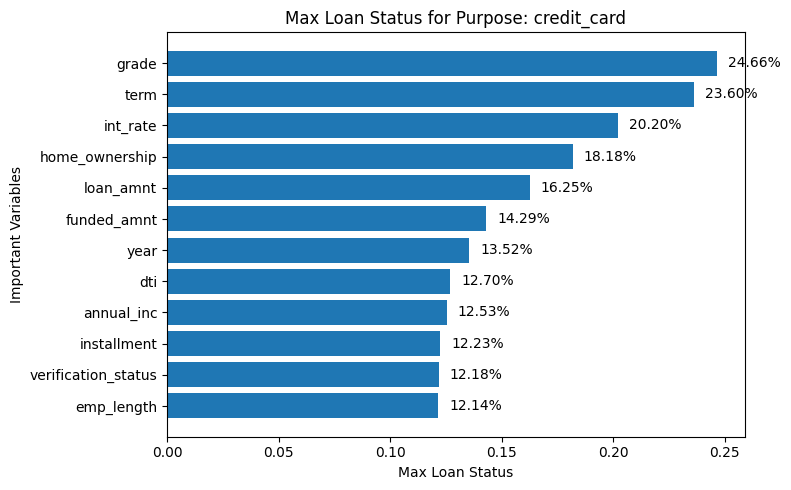

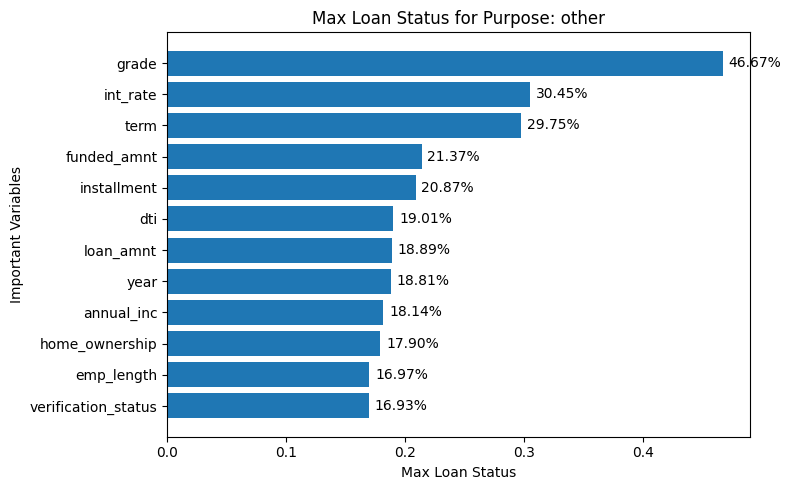

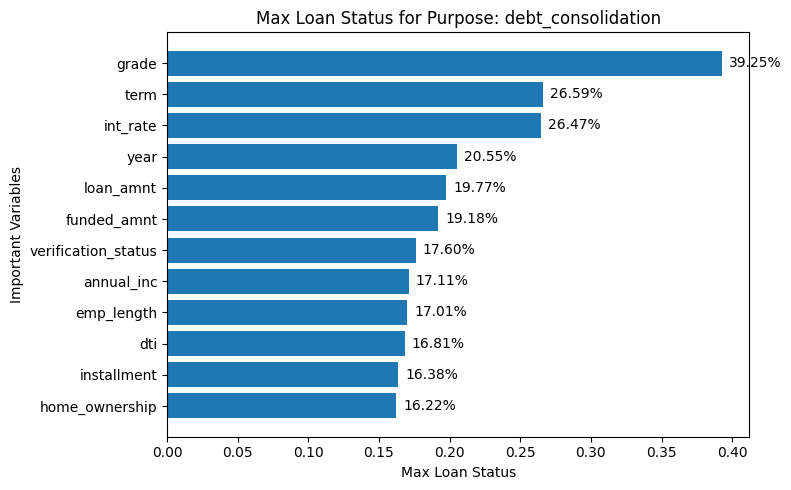

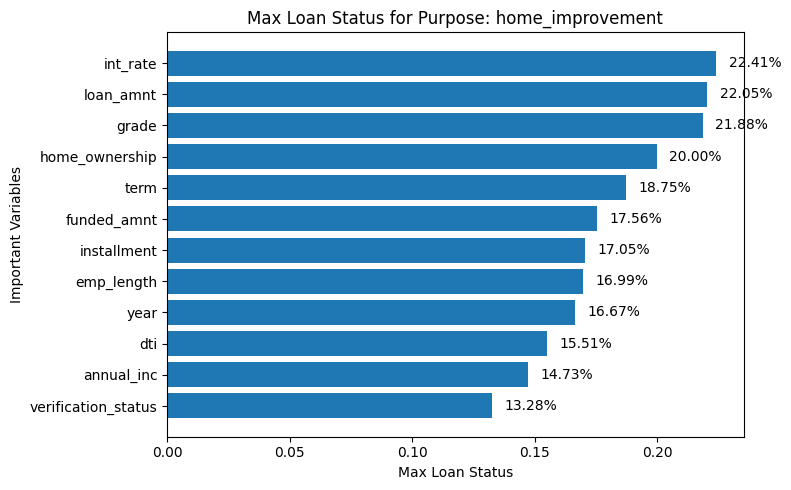

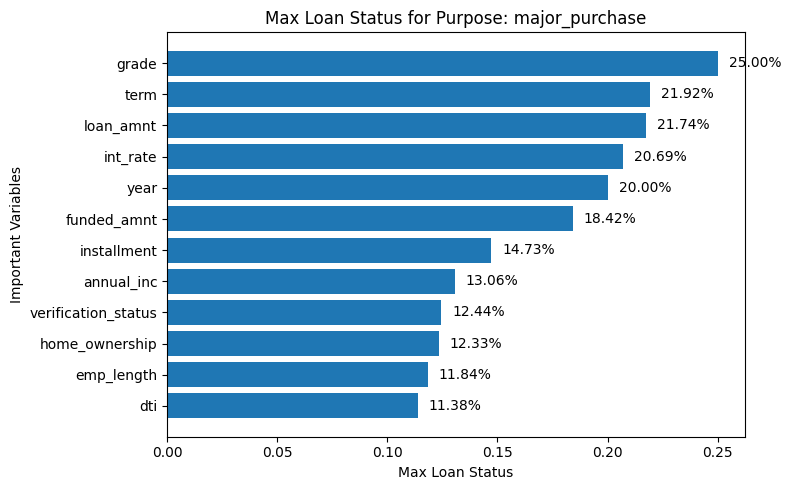

In [433]:
# Create a separate bar plot for each purpose with descending order
for purpose, max_values in max_values_by_purpose.items():
    # Get the indexes of the max values in descending order
    sorted_indexes = sorted(range(len(max_values)), key=lambda k: max_values[k][1], reverse=True)
    sorted_max_values = [max_values[i][1] for i in sorted_indexes]
    sorted_imp_vars = [imp_var_list[i] for i in sorted_indexes]

    plt.figure(figsize=(8, 5))
    bars = plt.barh(sorted_imp_vars, sorted_max_values)  # Use barh for horizontal bar plot
    plt.ylabel('Important Variables')
    plt.xlabel('Max Loan Status')
    plt.title(f'Max Loan Status for Purpose: {purpose}')

    # Add percentage labels on right of the bars
    for bar, value in zip(bars, sorted_max_values):
        width = bar.get_width()
        plt.text(
            width + 0.005, bar.get_y() + bar.get_height() / 2, f'{value * 100:.2f}%',
            va='center', fontsize=10
        )

    plt.tight_layout()
    plt.gca().invert_yaxis()  # Invert y-axis to have the highest value at the top
    plt.show()


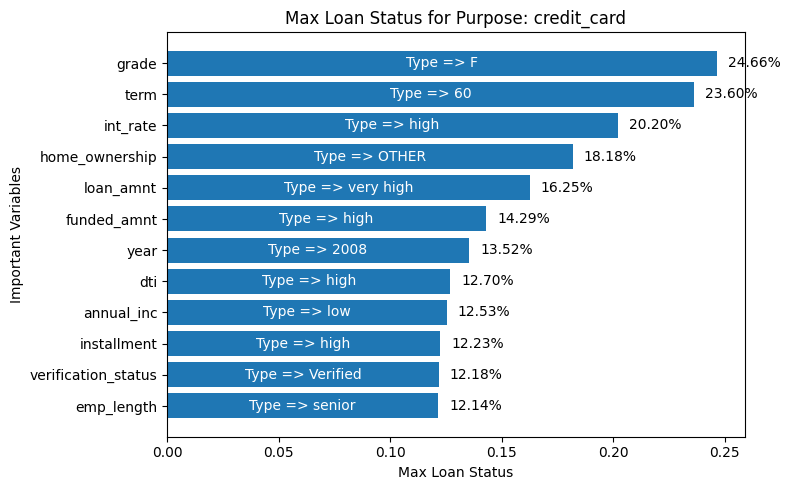

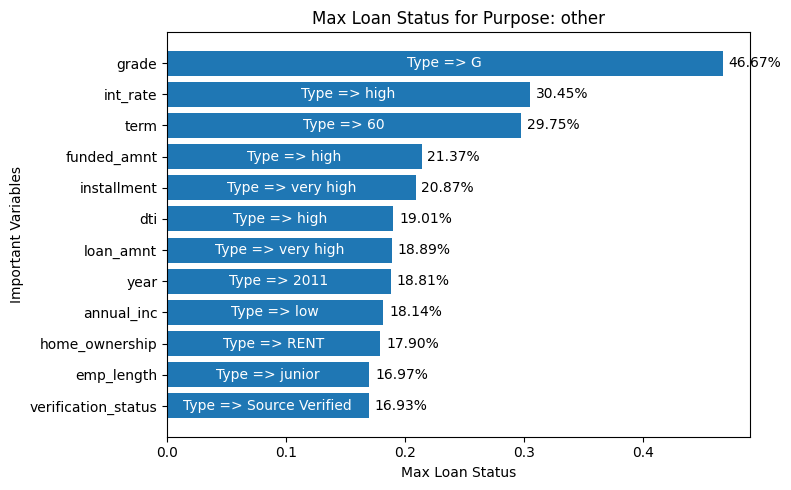

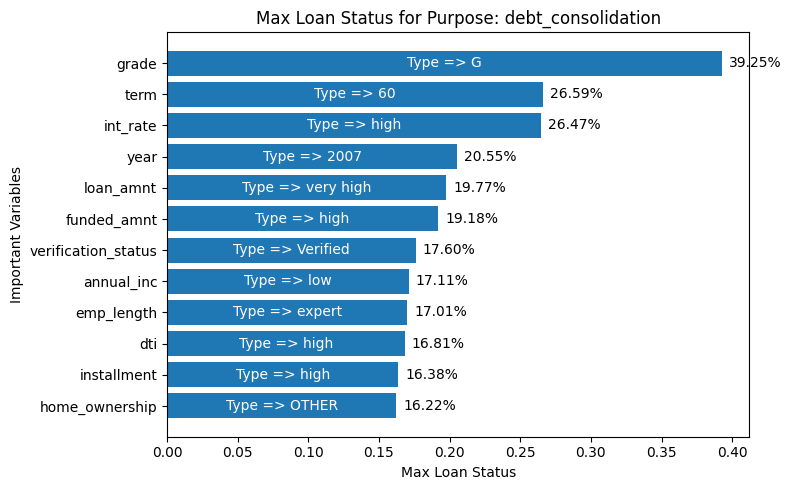

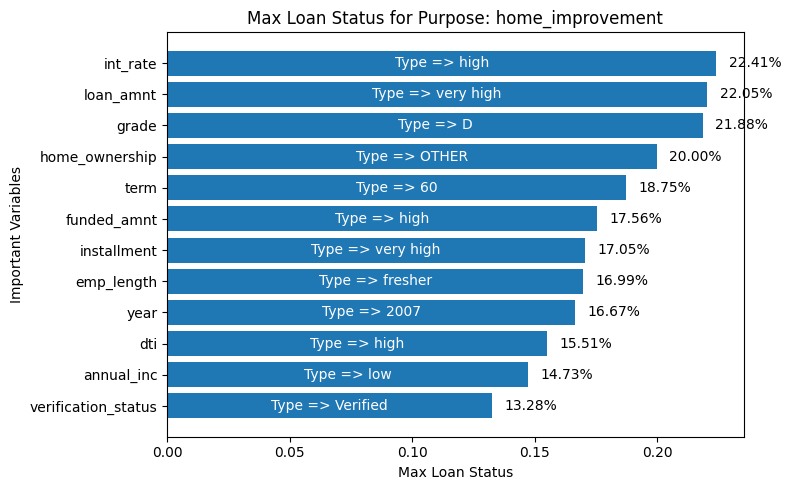

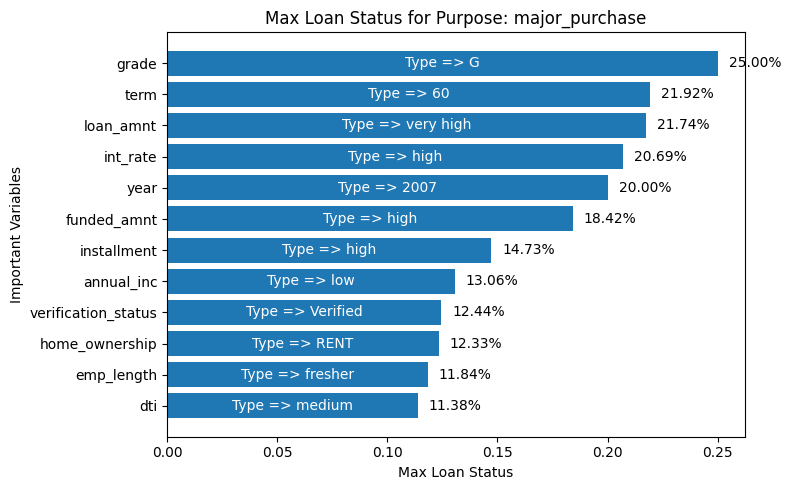

In [434]:
# Create a separate bar plot for each purpose with descending order
for purpose, max_values in max_values_by_purpose.items():
    # Get the indexes of the max values in descending order
    sorted_indexes = sorted(range(len(max_values)), key=lambda k: max_values[k][1], reverse=True)
    sorted_max_values = [max_values[i][1] for i in sorted_indexes]
    sorted_imp_vars = [imp_var_list[i] for i in sorted_indexes]

    # Get the corresponding category names for each max value
    sorted_categories = [max_values[i][0] for i in sorted_indexes]

    plt.figure(figsize=(8, 5))
    bars = plt.barh(sorted_imp_vars, sorted_max_values)  # Use barh for horizontal bar plot
    plt.ylabel('Important Variables')
    plt.xlabel('Max Loan Status')
    plt.title(f'Max Loan Status for Purpose: {purpose}')

    # Add bar height annotations outside the bars
    for bar, value in zip(bars, sorted_max_values):
        width = bar.get_width()
        plt.text(
            width + 0.005, bar.get_y() + bar.get_height() / 2, f'{value * 100:.2f}%',
            va='center', fontsize=10
        )

    # Add category names inside the bars
    for bar, category in zip(bars, sorted_categories):
        category = 'Type => '+ category
        plt.text(
            bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2,
            category, ha='center', va='center', color='white', fontsize=10
        )

    plt.tight_layout()
    plt.gca().invert_yaxis()  # Invert y-axis to have the highest value at the top
    plt.show()


In [435]:
DF4['int_rate_1'].head()

0     10.65
3     13.49
6     15.96
9     12.69
10    14.65
Name: int_rate_1, dtype: float64

In [436]:
unique_purposes = DF4['purpose'].unique()
unique_purposes

array(['credit_card', 'other', 'debt_consolidation', 'home_improvement',
       'major_purchase'], dtype=object)

In [437]:
def Plot_distplot_For_Purpose(purpose):
    purpose_data = DF4[DF4['purpose'] == purpose]

    sns.distplot(
        purpose_data['int_rate_1'],
        hist=False,
        kde_kws={'shade': True}

    )
    plt.ylabel('Interest Rate')
    plt.xlabel(purpose)
    plt.title(f'Interest Rate for Purpose: {purpose}')
    plt.show()

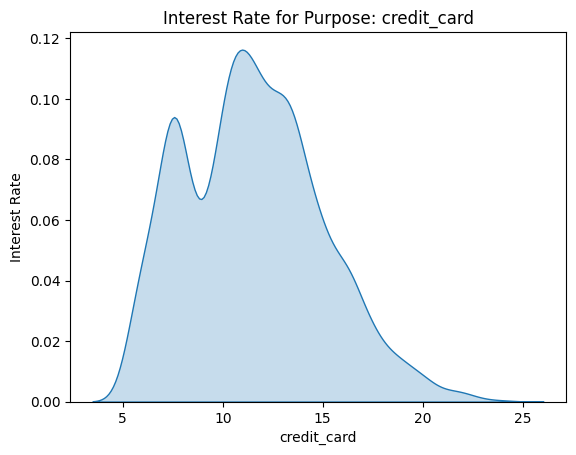

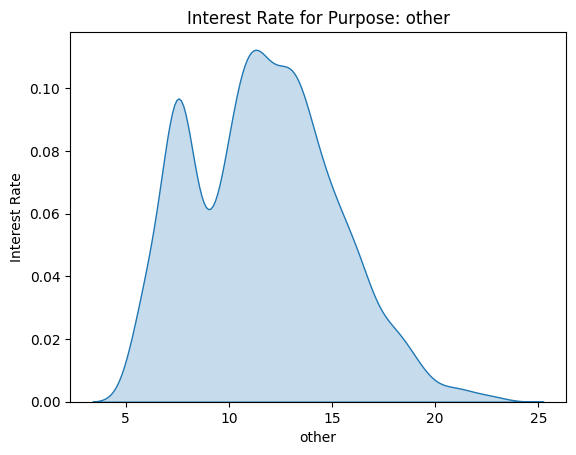

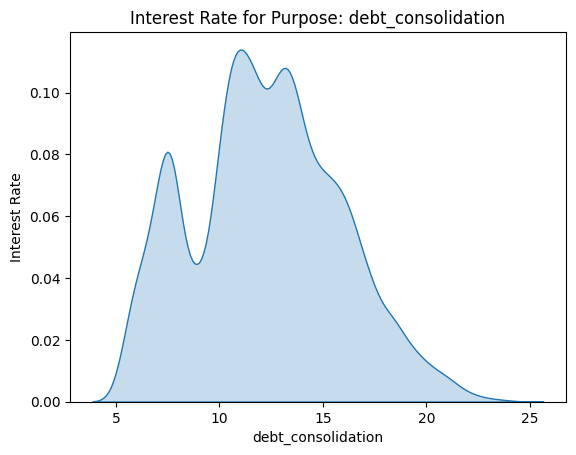

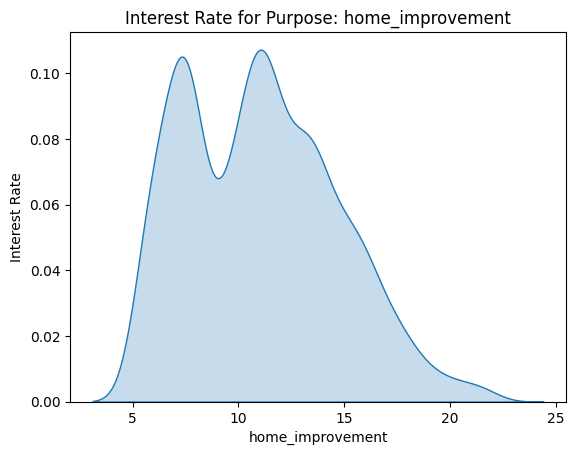

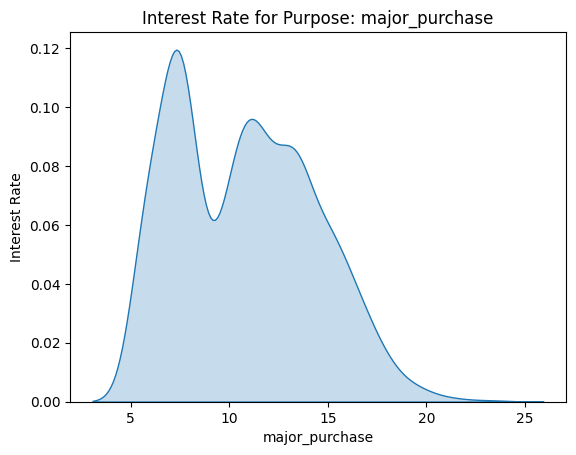

In [438]:
for pur in unique_purposes:
  Plot_distplot_For_Purpose(pur)

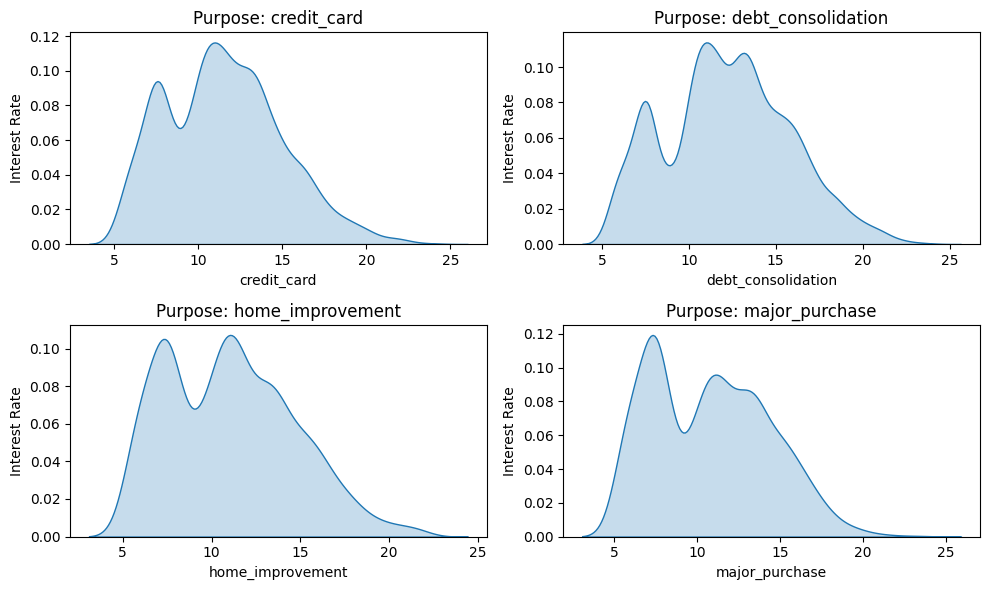

In [456]:
#PurposeWise('int_rate_1')
plt.figure(figsize=[10, 6])

unique_purposes = ['credit_card', 'debt_consolidation', 'home_improvement','major_purchase']
num_rows = 2
num_cols =2
for i, purpose in enumerate(unique_purposes):
    ax = plt.subplot(num_rows, num_cols, i + 1)

    purpose_data = DF4[DF4['purpose'] == purpose]

    sns.distplot(
        purpose_data['int_rate_1'],
        hist=False,
        kde_kws={'shade': True}

    )
    plt.title(f'Purpose: {purpose}')
    plt.ylabel('Interest Rate')
    plt.xlabel(purpose)

plt.tight_layout()
plt.show()